# Проект определения факторов успешности игры

## Содержание

<a href='#step1'>1. Описание проекта</a>

<a href='#step1.1'>1.1. Описание данных</a>

<a href='#step1.2'>1.2. План проекта</a>

<a href='#step2'>2. Общий анализ</a>

<a href='#step3'>3. Подготовка данных к анализу</a>

<a href='#step3.1'>3.1. Корретировка регистра в наименовании столбцов</a>

<a href='#step3.2'>3.2. Корректировка типов данных и замена пропусков</a>

<a href='#step4'>4.  Исследовательский анализ данных</a>

<a href='#step4.1'>4.1.  Жизненый цикл платформы</a>

<a href='#step4.2'>4.2.  Портрет пользователя</a>

<a href='#step4.2'>4.3.  Проверка гипотез</a>

<a href='#step5'>5.  Заключение</a>



## 1. Описание проекта<a id='step1'></a>

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Передо мной данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозирую ли я продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### 1.1. Описание данных<a id='step1.1'></a>

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
Данные за 2016 год могут быть неполными.

### 1.2. План проекта<a id='step1.2'></a>

   Открыть файл с данными и изучить общую информацию:

    Путь к файлу:/datasets/games.csv
    
   Подготовка данных к анализу:
   
    Проверить и заменить названия столбцов;
    Преобразовать данные в нужные типы;
    Обработать пропуски, дубликаты. Обратить внимание на аббревиатуру 'tbd';
    Описать причины, которые могли привести к пропускам;
    Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.
    
   Проведите исследовательский анализ данных:
   
    Какое количество игр выпускалось в разные годы?
    Исследовать продажи по платформам. ЖЦ платформ.
    Оценка возможности построения прогноза на 2017.
    Выбрать несколько потенциально прибыльных платформ.
    Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Сравнить продажи по платформам.
    Исследовать влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    Соотнести выводы с продажами игр на других платформах.
    Распределение игр по жанрам, самые прибыльные жанры.
    
   Составить портрет пользователя каждого региона (NA, EU, JP):
   
    Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
   Проверить статистические гипотезы:
   
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action и Sports разные.
    
Сделать общий вывод

## 2. Общий анализ<a id='step2'></a>

In [1]:
#импортирую библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats as st
#настроим отображение рамера графиков
rcParams['figure.figsize'] = 18, 8

<strong>Шаг 1. Откройте файл с данными и изучите общую информацию</strong>

In [2]:
games_table = pd.read_csv('/datasets/games.csv')
#создам словарь для хранения таблиц и их изменений
games_table_v0 = games_table.copy()
backup = pd.DataFrame(columns = ['версия', 'необходимость', 'название', 'комментарий'])
backup.loc[0] = ['v0', 'исходный файл', 'games_table_v0', 'выгрузка']
#общая информация о таблице
print(games_table.info())
games_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#проверим таблицу
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка


In [4]:
games_table.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<strong>Вывод</strong>

Начальный анализ выполнен, обнаружены следующие проблемы с типами данных в столбцах: year_of_release, users_scores и разнорегистрововые названия, для корректной работы требуется привести столбцы к int32, float32 - типам, а наименования трансформировать в нижний регистр.

Так как данные собирались из открытых источников есть предположения, что в открытых ресурсах либо присутствовали не все данные и при попытке автоматичесго сбора поля заполнились пустыми значениями, второй вариант сбощик не смог считать нужный признак. Пропуск в наименовании игры может означать невозвожность кодирования на латиницу исходного наименования, либо некоректная отработка сборщика. Отсутствие пользовательских отзывов и критиков: всё вышесказанное, плюс их могло просто не быть. Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA.

## 3. Подготовка данных к анализу<a id='step3'></a>

<strong>Шаг 2. Подготовьте данные</strong>

    Замените названия столбцов (приведите к нижнему регистру);
    Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    Обработайте пропуски при необходимости:
    Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    Опишите причины, которые могли привести к пропускам;
    Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
    Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### 3.1. Корретировка регистра в наименовании столбцов<a id='step3.1'></a>

In [5]:
%%time
#приведем названия столбцов к нижнему регистру
def lower_column(table):
    '''
    Вход: table - входная таблица типа dataframe, с первой строкой наименований
    Описание: функция понижает регистр наименований в Dataframe и создает словарь,
    в котором хранится новое и исходное наименование.
    '''
    lower_column = []
    old_and_new_column = {}
    for i in table.columns:
        lower_column.append(i.lower())
        old_and_new_column[i] = i.lower()
    table.columns = lower_column
    return table, old_and_new_column
lower_column(games_table)
    #построю график "Ящик с усами" для числовых атрибутов, для первоначального знакомства с данными
sns.set(style='darkgrid') #подключим стили sns
def all_box():
    (games_table
     .loc[:,'genre':'rating']
     .boxplot(figsize=(15,8))
     .set(title = 'Превью картина распределения по числовым показателям',\
          xlabel = 'Показатели',\
          ylabel = 'Числовые значения')\
    );
#fig_1 = all_box()
#fig_1
#рассмотрю 5 произвольных строк
games_table.sample(5)

CPU times: user 2.6 ms, sys: 672 µs, total: 3.28 ms
Wall time: 2.73 ms


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9899,Lost Magic,DS,2006.0,Role-Playing,0.09,0.00,0.02,0.01,68.0,8.2,E
14764,Betty Boop's Double Shift,DS,2007.0,Puzzle,0.03,0.00,0.00,0.00,NaN,tbd,E
3210,Crash of the Titans,PSP,2007.0,Action,0.25,0.24,0.00,0.14,NaN,7.1,E10+
10895,World Cup '98 France: Road to Win,SAT,1998.0,Sports,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10680,Micro Machines V3,PS,1997.0,Racing,0.06,0.04,0.00,0.01,NaN,NaN,NaN


### 3.2.  Корректировка типов данных и замена пропусков<a id='step3.2'></a>

Рассмотрю значение year_of_release на графике, но сначала, сделаю корректировку типа данных и уберу пропуски путем их замены на ноль.

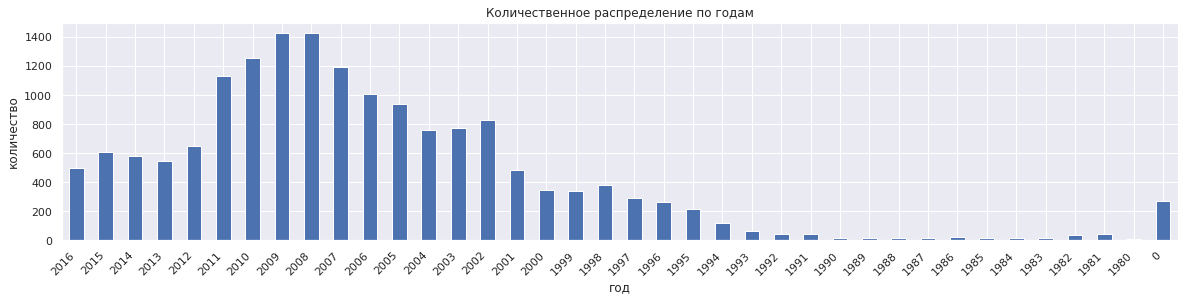

In [6]:
#если есть Nan занчения, то заменим их на 0, для того чтобы скорректировать тип данных
games_table['year_of_release'] = games_table['year_of_release'].fillna(0).astype('int32')
#бэкап с учетом корректировки типа и заполнения нулями пропусков
games_table_v1 = games_table.copy()
backup.loc[1] = ['v1','смена типа(int32) и заполнение(nan на 0)','games_table_v1','модификация - year_of_release']
#построию график
def count_on_year():
    sns.set()
    (games_table['year_of_release']
     .value_counts()
     .sort_index(ascending=False)
     .plot(kind='bar' ,figsize=(20,4))
     .set(title='Количественное распределение по годам')
    );
    plt.xlabel("год");
    plt.ylabel("количество");
    plt.xticks(rotation=45, horizontalalignment='right');
fig_2 = count_on_year()
fig_2

Кооректировка и замена выполненны, что видно по "столбу" со значением ноль, количество таких записей в районе 300.

Далее расмотрю users_score, уникальные значения данного признака на графике и распределение оценок

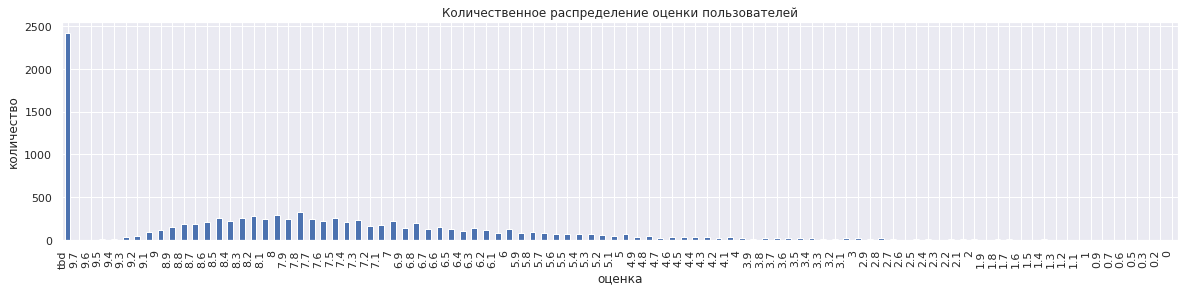

In [7]:
sns.set()
(games_table['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(20,4))
 .set(title='Количественное распределение оценки пользователей')
);
plt.xlabel("оценка");
plt.ylabel("количество");
plt.xticks(rotation=90, horizontalalignment='right');

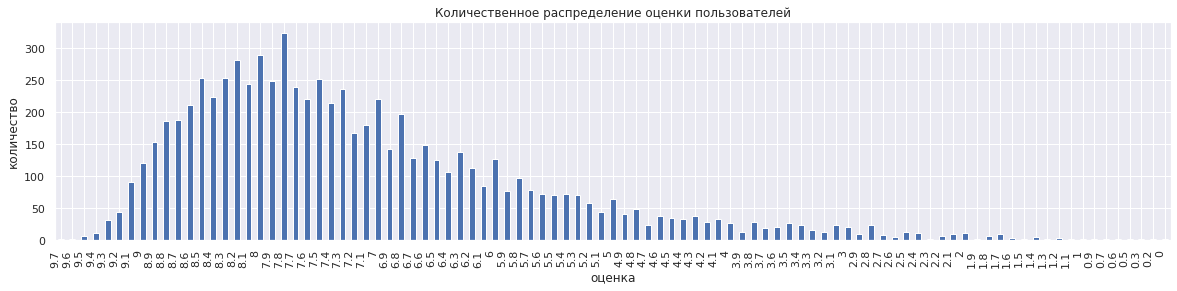

In [8]:
(games_table[games_table['user_score'] != 'tbd']['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(20,4))
 .set(title='Количественное распределение оценки пользователей')
);
plt.xlabel("оценка");
plt.ylabel("количество");
plt.xticks(rotation=90, horizontalalignment='right');

Распределение оценок напоминает - нормальное распределение со положительным "хвостом"

In [9]:
games_table['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Имеется Nan и значение tbd. Где tbd - абревиатура для ещё не вышедших игр, проверим гипотезу:

Количетво годов в которых есть tbd -  20


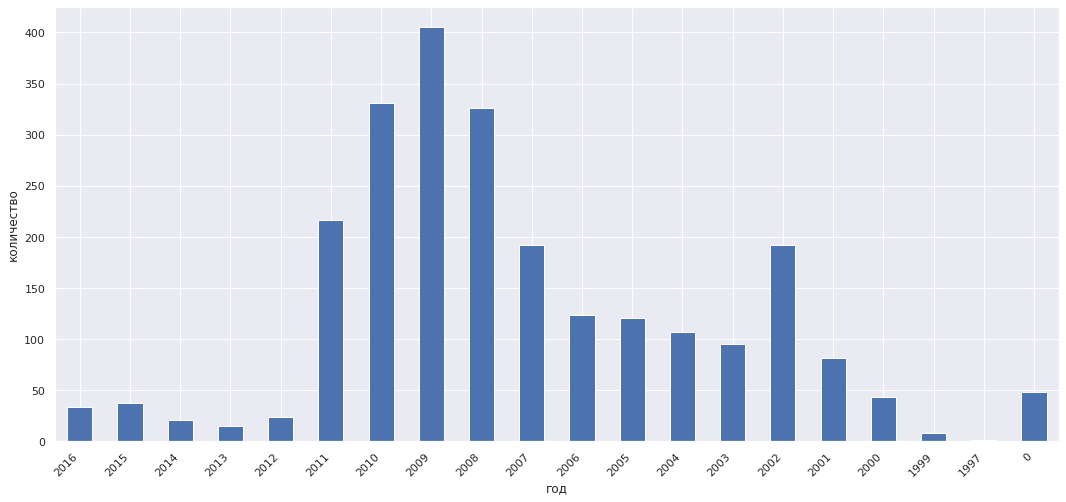

In [10]:
print(\
      'Количетво годов в которых есть tbd - ',\
      len(games_table[games_table['user_score'] == 'tbd']['year_of_release'].unique())\
     )
(games_table[games_table['user_score'] == 'tbd']['year_of_release']
 .value_counts().sort_index(ascending=False)
 .plot(kind='bar')\
);
plt.xlabel("год");
plt.ylabel("количество");
plt.xticks(rotation=45, horizontalalignment='right');

Данная гипотеза не подтвердилась, так как такое значение было бы только на последнии годы.

Согласно анализу сайта <a href="https://www.metacritic.com/" target="_blank">www.metacritic.com</a>, данный рейтинг означает, что рейтинг просто отсутствует. Проверим у скольких игр рейтинг 0.

In [11]:
games_table[games_table['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Сделаю замену tbd и Nan на ноль, значаит ноль, как рейтинг будет означать нет оценки или не проставлена оценка. Но перед этим рассмотрю предварительную корреляцтионную карту

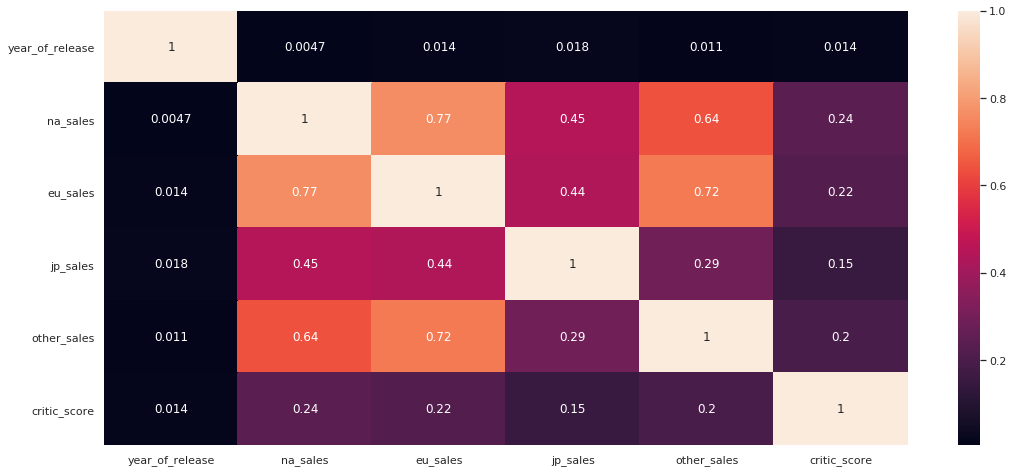

In [12]:
a = games_table.corr()
sns.heatmap(a, annot=True);


In [13]:
#очистка данных от tbd и nan
games_table.loc[games_table['user_score'] == 'tbd', 'user_score'] = 0
games_table['user_score'].fillna('0', inplace=True)
#перевод в тип float
games_table['user_score'] = pd.to_numeric(games_table['user_score'], errors='raise')
games_table['user_score'].describe()

count    16715.000000
mean         3.235363
std          3.688755
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

In [14]:
#посмотрю другие столбцы с пропусками
games_table.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

Нужно убрать пропуски в столбцах: имя, жанр

In [15]:
import warnings
warnings.filterwarnings('ignore')
#очистка данных от tbd и nan
games_table.loc[games_table['user_score'] == 'tbd', 'user_score'] = 0
games_table['user_score'].fillna('0', inplace=True)
#перевод в тип float
games_table['user_score'] = pd.to_numeric(games_table['user_score'], errors='raise')
games_table['user_score'].describe()

count    16715.000000
mean         3.235363
std          3.688755
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

Проверим дубликаты

In [16]:
print('количество дублей ', games_table.duplicated().sum())

for i in games_table.columns:
    if games_table[i].duplicated().sum() > 0:
        print('|{: >15} | {: >10}|'. format(i, games_table[i].duplicated().sum()))
    else:
        'good'

количество дублей  0
|           name |       5155|
|       platform |      16684|
|year_of_release |      16677|
|          genre |      16702|
|       na_sales |      16313|
|       eu_sales |      16408|
|       jp_sales |      16471|
|    other_sales |      16560|
|   critic_score |      16632|
|     user_score |      16620|
|         rating |      16706|


Смущают дубликаты в наименовании, вероятнее всего это дубли записей. Сделаем проверку:

In [17]:
games_dubl = games_table.name.duplicated()
table = pd.merge(games_table, games_dubl, left_index=True, right_index=True, how='inner')
table.head()

,name_x,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,False
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,False


In [18]:
games_table['revenue'] = games_table['na_sales']+games_table['eu_sales']+games_table['jp_sales']+games_table['other_sales']

In [19]:
temp_pivot_games = games_table\
.pivot_table(index=['name', 'genre', 'year_of_release'], values=['platform'], aggfunc='count')\
.sort_values(by='platform', ascending=False)

temp_pivot_games[temp_pivot_games['platform'] > 1].head()

,,,platform
name,genre,year_of_release,
Ratatouille,Action,2007,9
LEGO Marvel Super Heroes,Action,2013,9
FIFA 14,Sports,2013,9
LEGO The Hobbit,Action,2014,8
Angry Birds Star Wars,Strategy,2013,8


Разберу игру, которая повторяется 9 раз:

In [20]:
games_table.loc[games_table['name'] == 'LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+,2.22
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+,1.83
1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+,1.62
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+,1.05
2313,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+,0.89
2778,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82.0,8.0,E10+,0.74
3876,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,NaN,0.0,NaN,0.51
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+,0.38
8369,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+,0.17


Повторы в наименовании связаны с представлением разных версий одной игры для разных платформ, что несёт за собой для каждой платформы свои уникальные показатели. Нужно проверить отсутствие повторов в игровых показателях рейтинга и платформах.

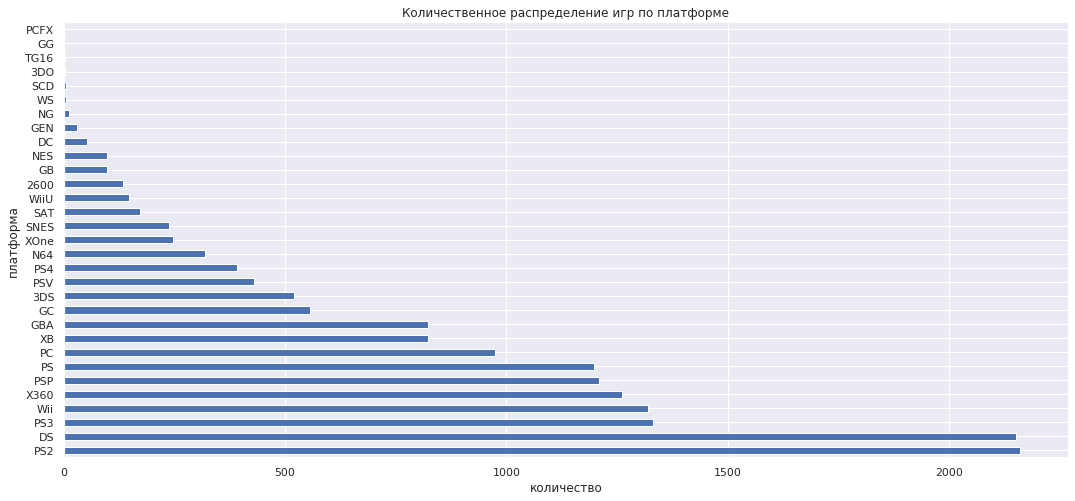

In [21]:
games_table['platform'].value_counts().plot(kind='barh').set(title='Количественное распределение игр по платформе');
plt.xlabel("количество");
plt.ylabel("платформа");

вроде все ок продолжим

В столбце rating содержится данные рейтинга <a href="https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board" target="_blank">ESRB</a> . Рейтинги ESRB дейтвительны в США и Канаде, и многие игровые издатели с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр:  <a href="https://ru.wikipedia.org/wiki/Pan_European_Game_Information" target="_blank">PEGI</a> в Европе, CERO в Японии, а так же в Австралии. Значит данный рейтинг только для США и Канады, а в нашей таблице данных больше и с другой локацией, поэтому пропуски - это нормально, заменим их на TBD.

Столбец critic_store содержит оценку критиков в стобальной шкале оценок, если пропуск заменю его на 0, что будет означать, что критики нет для данной игры.

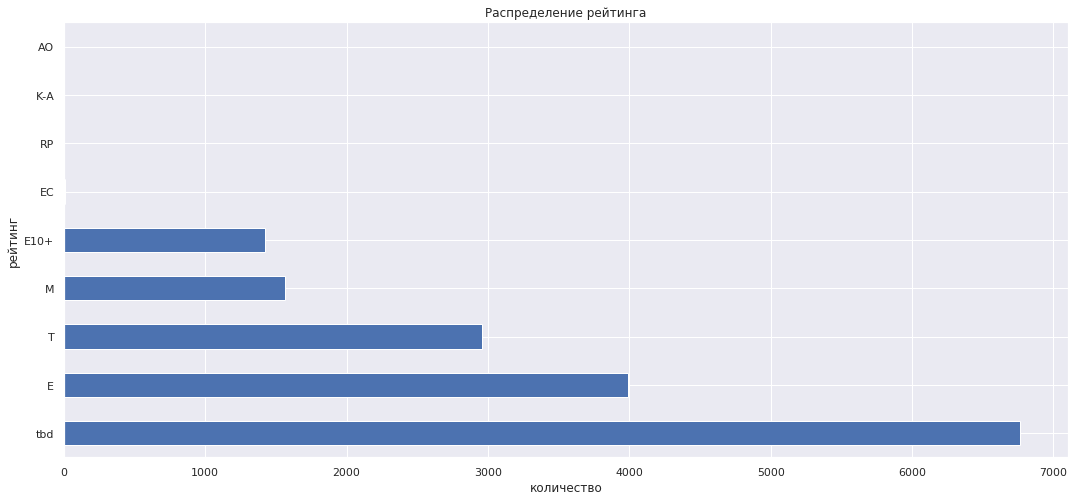

In [22]:
#столбец рейтинга ESRB категориальный, поэтому лучшей заменой будет проставнока константы - tbd
games_table['rating'].fillna('tbd', inplace=True)
games_table['critic_score'].fillna(0, inplace=True)
games_table.loc[games_table['rating'] == 'None', 'rating'] = 'tbd'
games_table['rating'].value_counts().plot(kind='barh').set(title='Распределение рейтинга');
plt.xlabel("количество");
plt.ylabel("рейтинг");

In [23]:
games_table.loc[games_table['name'] == 'LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+,2.22
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+,1.83
1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+,1.62
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,0.0,6.8,E10+,1.05
2313,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+,0.89
2778,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82.0,8.0,E10+,0.74
3876,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,0.0,0.0,tbd,0.51
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,0.0,4.8,E10+,0.38
8369,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+,0.17


Выявлю строки с пропуском в жанре для анализа

In [24]:
games_table['genre'].fillna('ggg', inplace=True)
games_table[games_table['genre'] == 'ggg']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
659,NaN,GEN,1993,ggg,1.78,0.53,0.00,0.08,0.0,0.0,tbd,2.39
14244,NaN,GEN,1993,ggg,0.00,0.00,0.03,0.00,0.0,0.0,tbd,0.03


пропуски в жанре и имени оказались связаны, поэтому данные строки лучше удалить, так как никакой информации не несут.

In [25]:
games_table = games_table.drop([659,14244])
games_table[games_table['genre'] == 'ggg']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue


In [26]:
print('пропуски')
print(games_table.isnull().sum())
games_table = games_table.dropna()

пропуски
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64


In [27]:
#бэкап с учетом корректировки типа и заполнения нулями пропусков
games_table_v2 = games_table.copy()
backup.loc[2] = ['v2','удалены пропуски, дубли','games_table_v2','0 в рейтинге - не оценен, дабавлен revenue']
print('Сумарное количесво пропусков', games_table.isnull().sum().sum())

Сумарное количесво пропусков 0


In [28]:
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка
1,v1,смена типа(int32) и заполнение(nan на 0),games_table_v1,модификация - year_of_release
2,v2,"удалены пропуски, дубли",games_table_v2,"0 в рейтинге - не оценен, дабавлен revenue"


<strong>Вывод</strong>

Все пропуски поправил:
    
    Пропуски в столбце rating были замененны на "tbd", что означает что рейтинга нет или он ожидается;
    Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра;
    Пропуски в столбцах "critic_score" и "user_score" были заменены на нулевые, что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, так как будет смещение в данных.

## 4.  Исследовательский анализ данных<a id='step4'></a>

<strong>Шаг 3. Проведите исследовательский анализ данных</strong>

    Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. 4.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
    Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    Соотнесите выводы с продажами игр на других платформах.
    Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?    

Учту гипотезу, что у некоторых игр, с пропущенными годами, есть данные по годам, но по другим платформам, поэтому сделаем заполнение нулевого года данными на основании медианного года выпуска определенной игры без учёта платформы:

In [29]:
#eсли среднее по годам имеет десятичный хвост, то это означает, что игра была выпущена в разные годы, 
#то есть медианная дата выпуска будет максимально правильной датой 
temp_pivot_games = games_table\
.pivot_table(index=['name', 'genre'], values=['year_of_release'], aggfunc='mean')\
.sort_values(by='year_of_release', ascending=False)
temp_pivot_games[(temp_pivot_games['year_of_release'] % 1) != 0].head()

,,year_of_release
name,genre,
Digimon Story: Cyber Sleuth,Role-Playing,2015.500000
The Book of Unwritten Tales 2,Adventure,2015.500000
Rise of the Tomb Raider,Adventure,2015.500000
Need for Speed (2015),Racing,2015.333333
Arslan: The Warriors of Legend,Action,2015.333333


In [30]:
%%time
def temp_func(row):
    '''
    функция для обработки строки с заменой нулевого года на медианной год выпуска игры без учета платформы
    '''
    year = row['year_of_release']
    if year == 0:
        year = temp.loc[row['name'],'year_of_release']
        return year
    else:
        return row.year_of_release
#before = games_table[games_table['year_of_release'] == 0]['year_of_release'].count()
temp = games_table.pivot_table(index='name', values='year_of_release', aggfunc='max')
games_table['year_of_release'] = games_table.apply(temp_func, axis=1).astype('int64')
#games_table.plot(x = 'year_of_release', kind='bar');

CPU times: user 1.15 s, sys: 7.41 ms, total: 1.16 s
Wall time: 1.17 s


Проверим как заполнились игровые пропуски, на примере:

In [31]:
#games_table = games_table.reset_index(drop=True)
games_table.loc[182:184]
games_table[games_table['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
183,Madden NFL 2004,PS2,2003,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


In [32]:
games_table[games_table['name'] == 'wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.0


In [33]:
print('Количество игр без дат -', temp[temp['year_of_release'] == 0]['year_of_release'].count())
games_table[games_table['year_of_release'] == 0].head()

Количество игр без дат - 133


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.00
627,Rock Band,X360,0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,0.0,E,2.40
805,Rock Band,Wii,0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62


Выявлено, что у некоторых игр в наименовании есть год, что позволяет нам предзаполнить года. Обработаю оставшиеся записи с нулевыми годами:

In [34]:
year = str([x for x in range(1980,2018)])
def temp_func(row):
    yrow = row['year_of_release']
    nrow = row['name']
    if yrow == 0:
        sp_row = nrow.split(' ')
        for j in sp_row:
            if (j in year) and (len(j)==4):
                return int(j)
            else:
                return yrow
    else:
        return yrow
games_table['year_of_release'] = games_table.apply(temp_func, axis=1)
games_table

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,tbd,0.01


Повторим

In [35]:
print('Количество игр без дат -', temp[temp['year_of_release'] == 0]['year_of_release'].count())
games_table[games_table['year_of_release'] == 0].head()

Количество игр без дат - 133


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.00
627,Rock Band,X360,0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,0.0,E,2.40
805,Rock Band,Wii,0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62


In [36]:
games_table[games_table['year_of_release'] == 0]['year_of_release'].count()

146

Данные по годам удалось восстановить почти у половины записей, соответственно строки, в которых отсутствует год нам для анализа не нужны, так как нет главного признака - год, что не позволяет сделать анализ в принципе.

Избавлюсь от нулевых годов:

In [37]:
games_table = games_table[games_table['year_of_release']!=0]
games_table.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


In [38]:
games_table_v3 = games_table.copy()
backup.loc[3] = ['v3','восстановлены года','games_table_v3','файл готов к анализу']
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка
1,v1,смена типа(int32) и заполнение(nan на 0),games_table_v1,модификация - year_of_release
2,v2,"удалены пропуски, дубли",games_table_v2,"0 в рейтинге - не оценен, дабавлен revenue"
3,v3,восстановлены года,games_table_v3,файл готов к анализу


Построю выборку распределения по годам

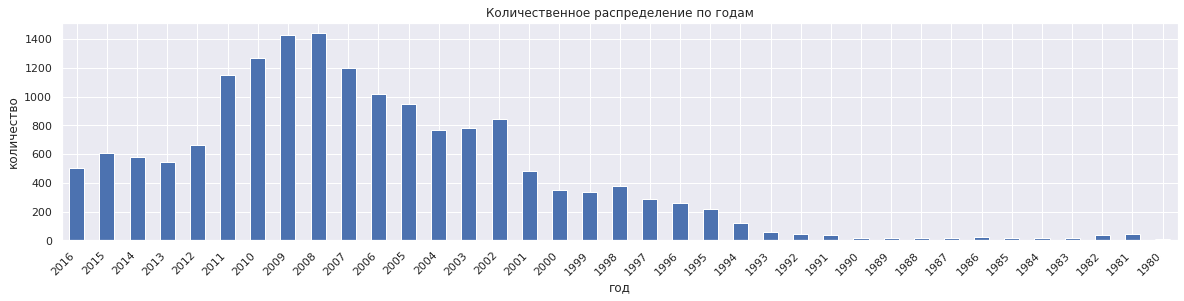

In [39]:
fig_3 = count_on_year()
fig_3

Построю выборку распределения по годам, в разрезе платформ

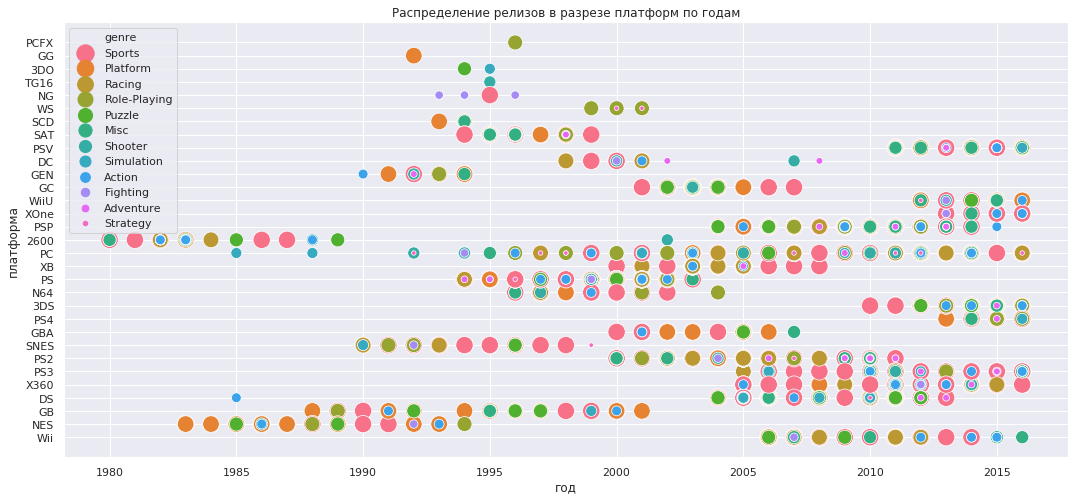

In [40]:
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="genre"\
                ,data=games_table\
                ,sizes=(20, 300))\
                .set(title='Распределение релизов в разрезе платформ по годам');
plt.xlabel("год");
plt.ylabel("платформа");

Значительная часть платформ устарели и теперь отсутсвуют, например, платформа 2600 была только до 1990, соответственно изменилось время и факторы успеха должны были измениться. Рассмотрим график с 2000 года.

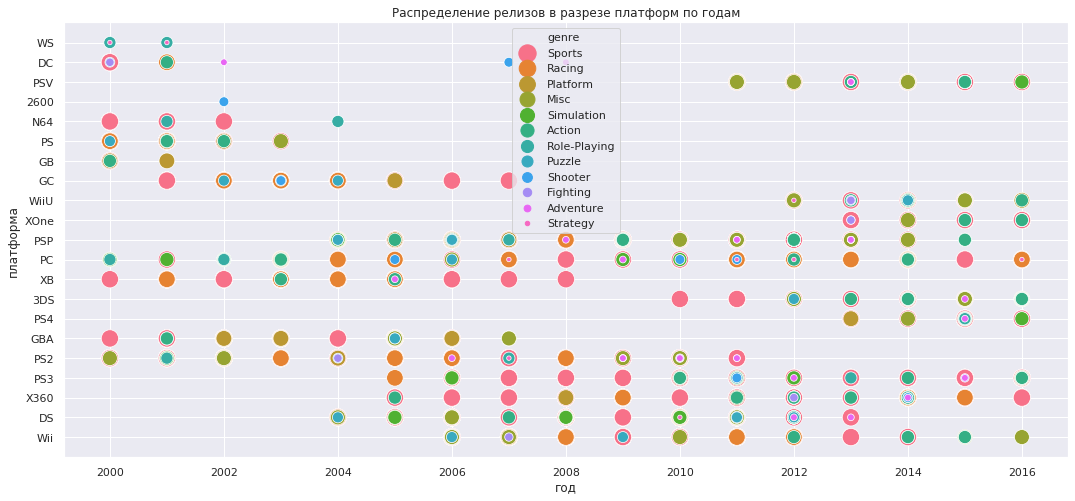

In [41]:
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="genre"\
                ,data=games_table[games_table['year_of_release'] >= 2000]\
                ,sizes=(20, 300))\
                .set(title='Распределение релизов в разрезе платформ по годам');
plt.xlabel("год");
plt.ylabel("платформа");

<strong>Вывод</strong>

Многие платформы исчезли к 21 веку. Очень не хватает в данных столбца с игровыми новинками в технологии, так как технологический рывок провоцирует моральное устаревание продукта, а соответственно спад использования игр, и такого столбца также не хватает, то есть второй нужный столбец для анализа количество игроков в год для игр в разрезе платформ.

### 4.1.  Жизненый цикл платформы<a id='step4.1'></a>

In [42]:
temp = (games_table.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
temp

,year_of_release
platform,
2600,11
3DO,2
3DS,7
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


Построю график по длительности релизов

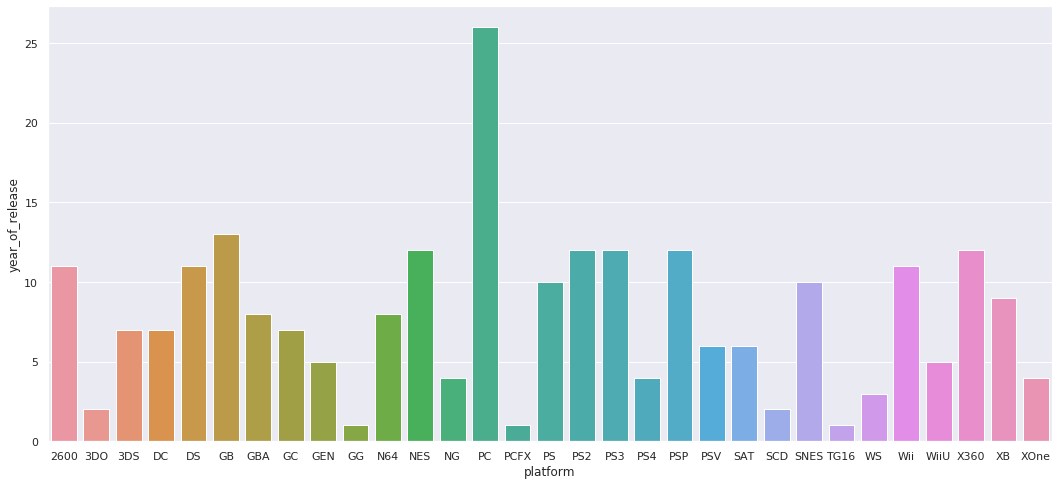

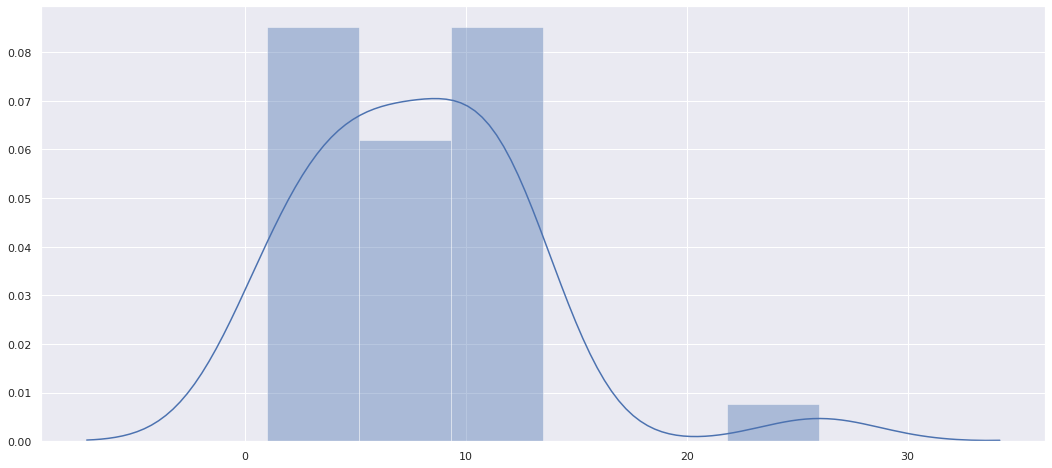

In [43]:
sns.barplot(x=temp.index, y='year_of_release', data = temp) #, ax=axis[0,0])
plt.show()
sns.distplot(temp) #, ax=axis[0,1]);
plt.show()

Посчитаю выбоку по релизам

In [44]:
temp.year_of_release.describe()

count    31.000000
mean      7.806452
std       5.114811
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

<strong>Вывод</strong>

Средний срок жизненого цикла платформы 7 лет. 

Следующие платформы нектуальны: WS, DC, N64,PS, GB, GC, XB, PS, PS2, DS, GBA. Рассмотрим график без данных платформ.

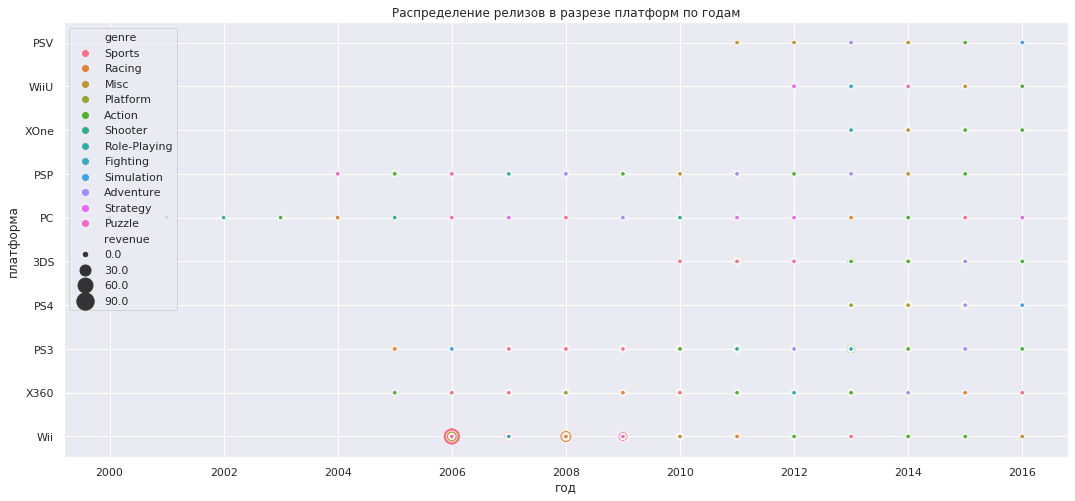

In [45]:
modern_platform = set(games_table['platform'].unique()) - \
set([ 'WS', 'DC', 'N64','PS', 'GB', 'GC', 'XB', 'PS', 'PS2', 'DS', 'GBA', '2600'])
temp_games = games_table[(games_table['year_of_release'] >= 2000)&(games_table['platform'].isin(modern_platform))]
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="revenue"\
                ,data=temp_games\
                ,sizes=(20, 300))\
                .set(title='Распределение релизов в разрезе платформ по годам');
plt.xlabel("год");
plt.ylabel("платформа");

Выборка снизила наглядность, жанры перекрывают друг друга. Переформатирую графики для наглядности.

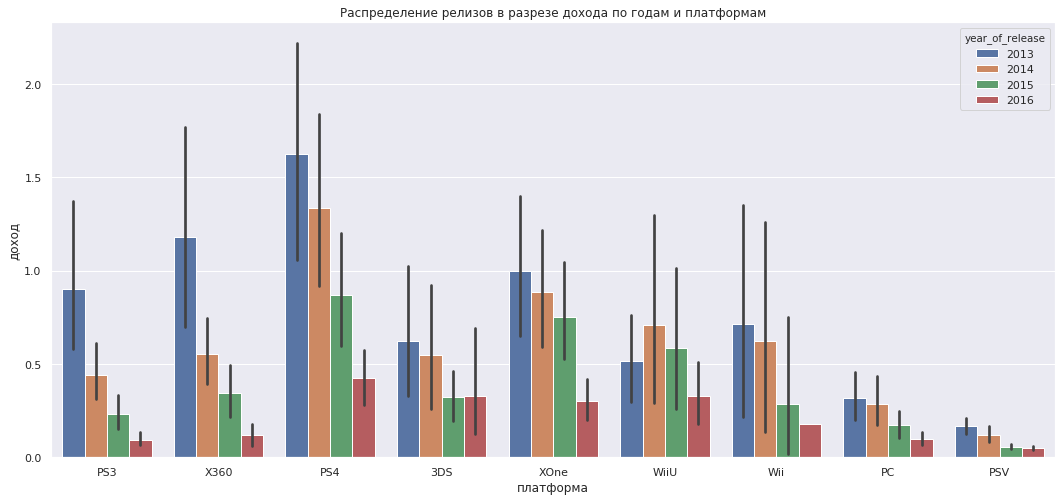

In [46]:
temp_games = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))&(temp_games['platform'] != 'PSP')]
ax = sns.barplot(y='revenue', x='platform', hue='year_of_release',\
                 data = temp_games\
                )\
                .set(title='Распределение релизов в разрезе дохода по годам и платформам');
plt.xlabel("платформа");
plt.ylabel("доход");

Общий тренд всех игровых платформ - падение, то есть ежегодное падение общей выручки в рамках всех жанров.

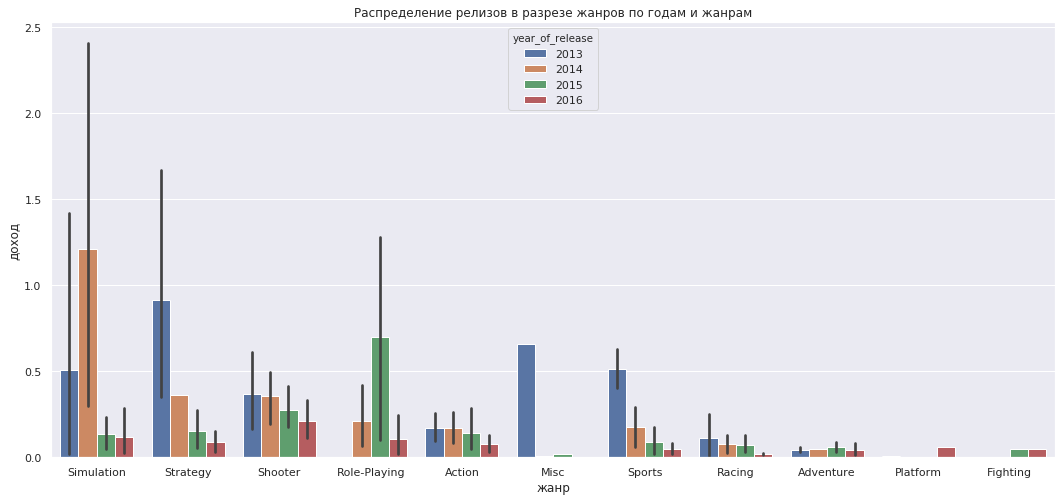

In [47]:
ax = sns.barplot(y='revenue', x='genre', hue='year_of_release',\
                 data = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))&\
                                   (temp_games['platform'] == 'PC')]\
                )\
                .set(title='Распределение релизов в разрезе жанров по годам и жанрам');
plt.xlabel("жанр");
plt.ylabel("доход");

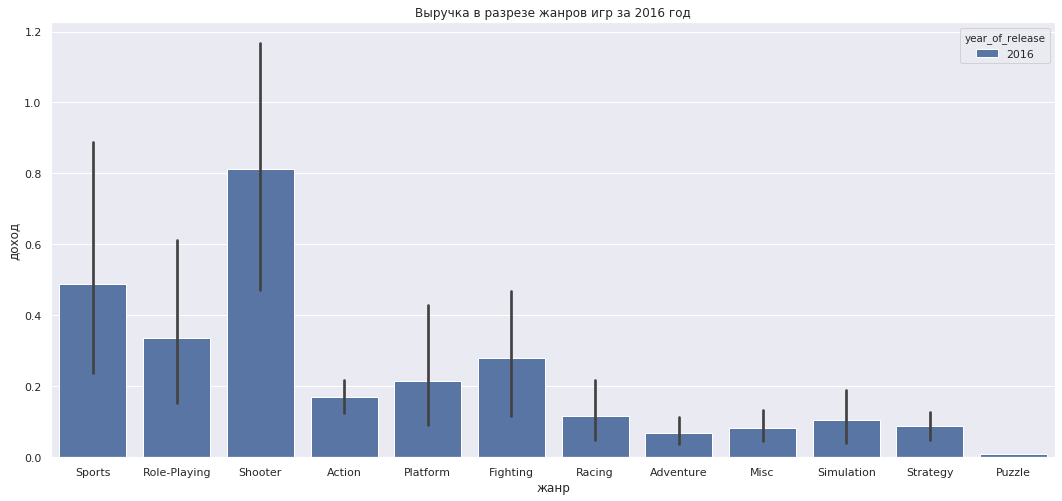

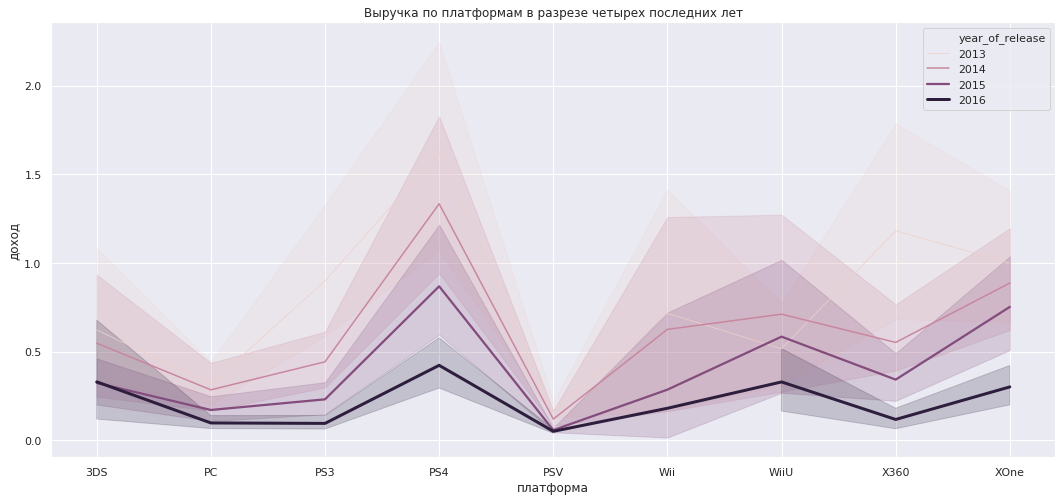

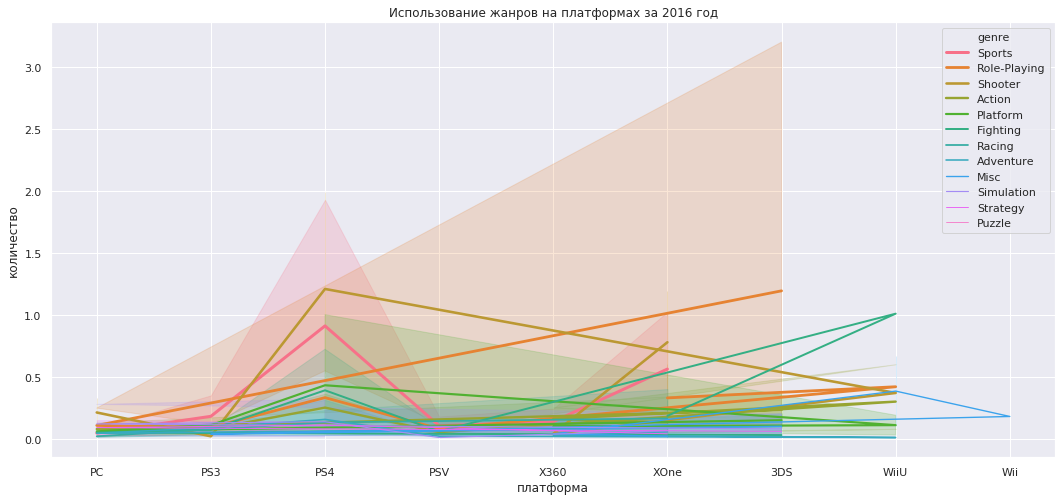

In [48]:
def fig():
    #--------------------------------------------------------------------------------------------------------
    ax_1 = sns.barplot(y='revenue', x='genre', hue = 'year_of_release'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                            #&(temp_games['revenue'] > 1)\
                           ].sort_values(by='revenue', ascending=False)\
                    ).set(title='Выручка в разрезе жанров игр за 2016 год');
    plt.xlabel("жанр");
    plt.ylabel("доход");
    plt.show()
    #--------------------------------------------------------------------------------------------------------
    ax_2 = sns.lineplot(y='revenue', x='platform', hue='year_of_release', size = 'year_of_release'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))\
                           # &(temp_games['platform'] == 'PC')\
                           ]\
                    ).set(title='Выручка по платформам в разрезе четырех последних лет');
    plt.xlabel("платформа");
    plt.ylabel("доход");
    plt.show()
    #--------------------------------------------------------------------------------------------------------
    ax_3 = sns.lineplot(y='revenue', x='platform', hue='genre', size = 'genre'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                            #&(temp_games['platform'] == 'PC')\
                           ]\
                    ).set(title='Использование жанров на платформах за 2016 год');
    plt.xlabel("платформа");
    plt.ylabel("количество");
    plt.show()
fig()

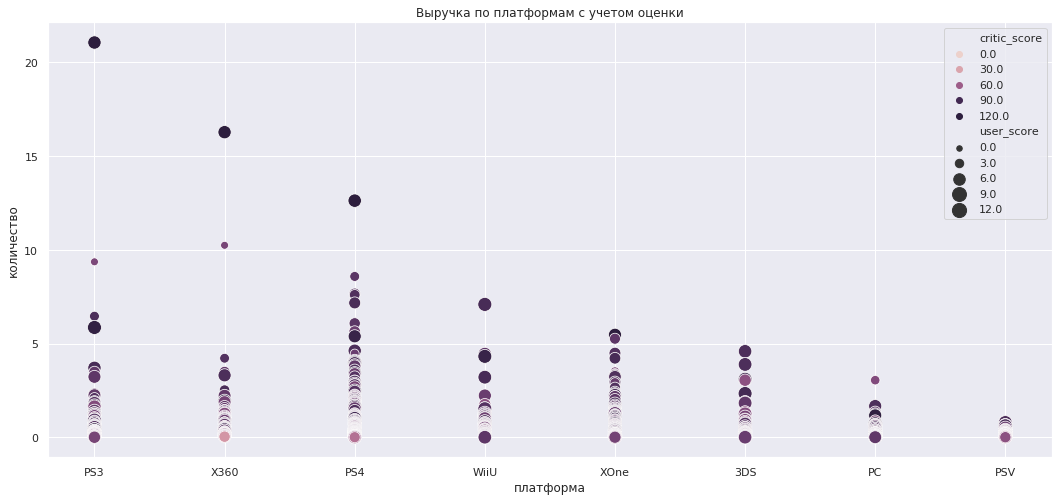

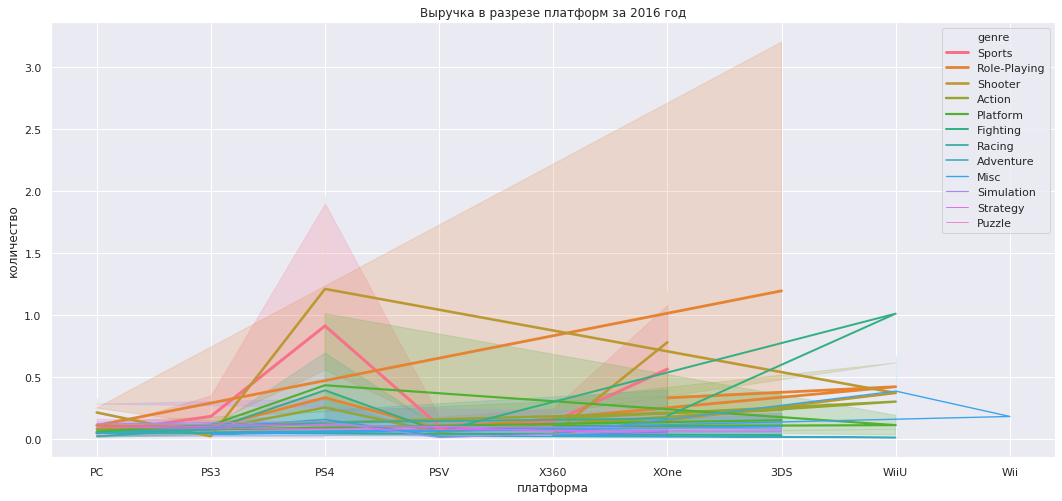

In [49]:
ax = sns.scatterplot(y='revenue', x='platform', hue='critic_score', size = 'user_score'\
                 ,data = temp_games[(temp_games['year_of_release'].isin([2012,2013,2014,2015,2016]))\
                                    &(temp_games['user_score'] > 0)\
                                    &(temp_games['critic_score'] > 0)\
                       ],\
                     sizes=(30,200)\
                ).set(title='Выручка по платформам с учетом оценки');
plt.xlabel("платформа");
plt.ylabel("количество");
plt.show()
#--------------------------------------------------------------------------------------------------------
ax = sns.lineplot(y='revenue', x='platform', hue='genre', size = 'genre'\
                 ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                        #&(temp_games['platform'] == 'PC')\
                       ]\
                ).set(title='Выручка в разрезе платформ за 2016 год');
plt.xlabel("платформа");
plt.ylabel("количество");
plt.show()

    Гипотеза: жанровый портфель уменьшается в связи с нисходящим тредом выручки.

    Гипотеза: уменьшение жанров ведёт к вымиранию платформы

<strong>Вывод</strong>

    Игровая индустрия очень быстро изменяется;
    Тренд выручки нисходящий;
    Топ платформы: PS4, WiiU, XOne, 3DS;
    Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов.
    Топ-низ жанры: Adventure, Puzzle;
    Средний срок жизни платформы - 7 лет.

Изучим детальнее платформу Wii:

In [50]:
temp_games[(temp_games['year_of_release'].isin([2016]))\
                        &(temp_games['platform'] == 'Wii')\
                       ]['genre']

8009    Misc
Name: genre, dtype: object

In [51]:
games_table[(games_table['platform'] == 'Wii')].pivot_table('name','year_of_release', aggfunc='count').describe()

,name
count,11.000000
mean,118.272727
std,125.647993
min,1.000000
25%,9.000000
50%,48.000000
75%,220.500000
max,325.000000


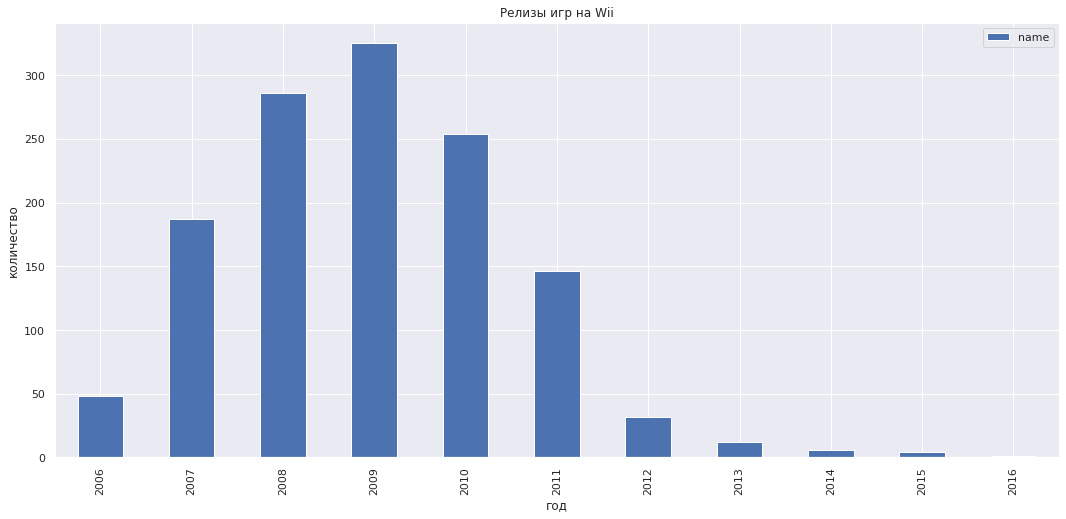

In [52]:
games_table[(games_table['platform'] == 'Wii')].pivot_table('name','year_of_release', aggfunc='count').plot(kind='bar')\
.set(title='Релизы игр на Wii');
plt.xlabel("год");
plt.ylabel("количество");

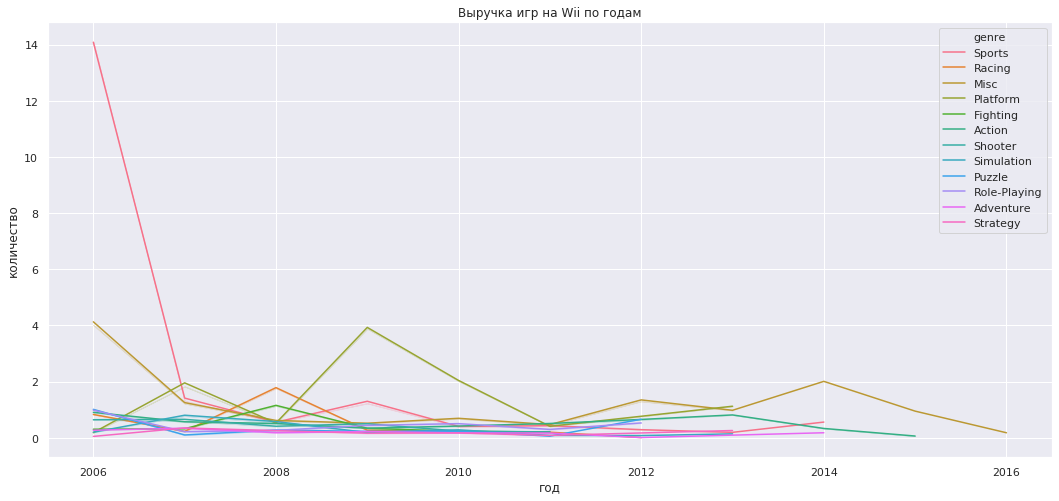

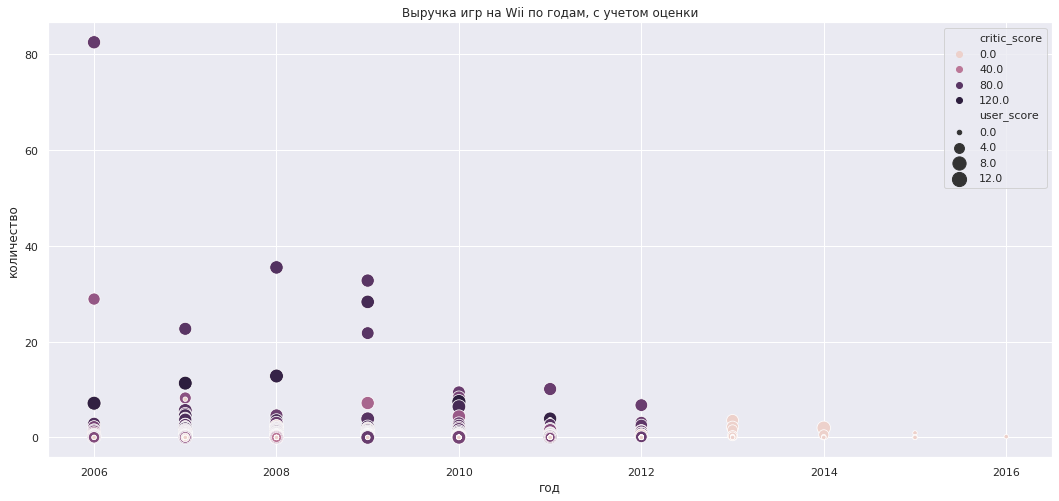

In [53]:
ax = sns.lineplot(y='revenue', x='year_of_release', hue='genre',\
                  markers=True, ci=False,\
                 data = games_table[(games_table['platform'] == 'Wii')]).set(title='Выручка игр на Wii по годам');
plt.xlabel("год");
plt.ylabel("количество");
plt.show()

ax = sns.scatterplot(y='revenue', x='year_of_release',hue='critic_score',size='user_score',\
                     sizes=(20,200), data = games_table[(games_table['platform'] == 'Wii')])\
.set(title='Выручка игр на Wii по годам, с учетом оценки');
plt.xlabel("год");
plt.ylabel("количество");
plt.show()

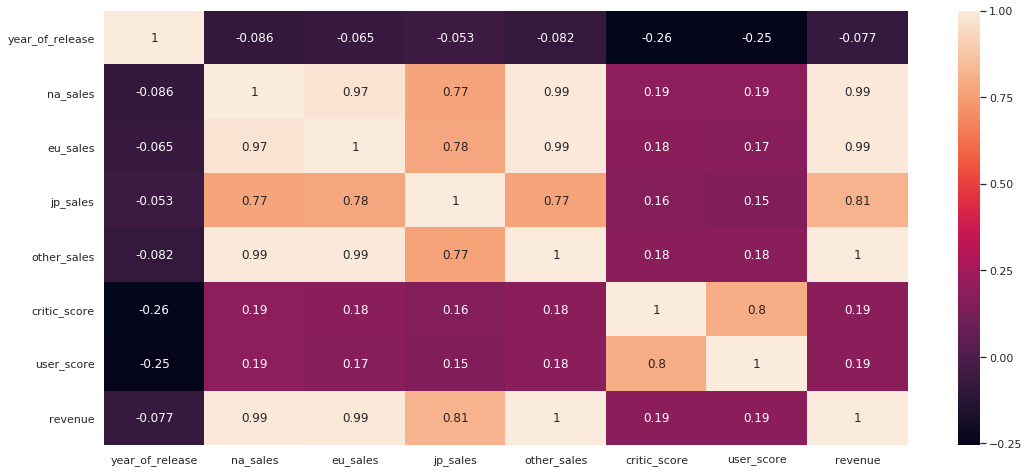

In [54]:
a = games_table[(games_table['platform'] == 'Wii')].corr()
sns.heatmap(a, annot=True);

<strong>Вывод</strong>

Платформа Wii теряет ежегодно выручку и уменьшает количество жанров, также компания получает всё больше низких оценок со стороны пользователей. Количество игр уменьшается с 325 в 2009 до 1 в 2016. После 2012 года начался закат платформы, так как количество игр было симметрично этапу появления платформы. Чётко прослеживается нормальное распределение. Нет широкого портфеля жанров, платформа деградирует, разработчики перестают разрабатывать игры и как следствие выручка от игр падает. Данный анализ платформы подтверждает начальное предположение о сроке жизни платформ, который равен 9 годам.

Рассмотрю лучше топовые платформы и количественное распределение игр на этих платформах:

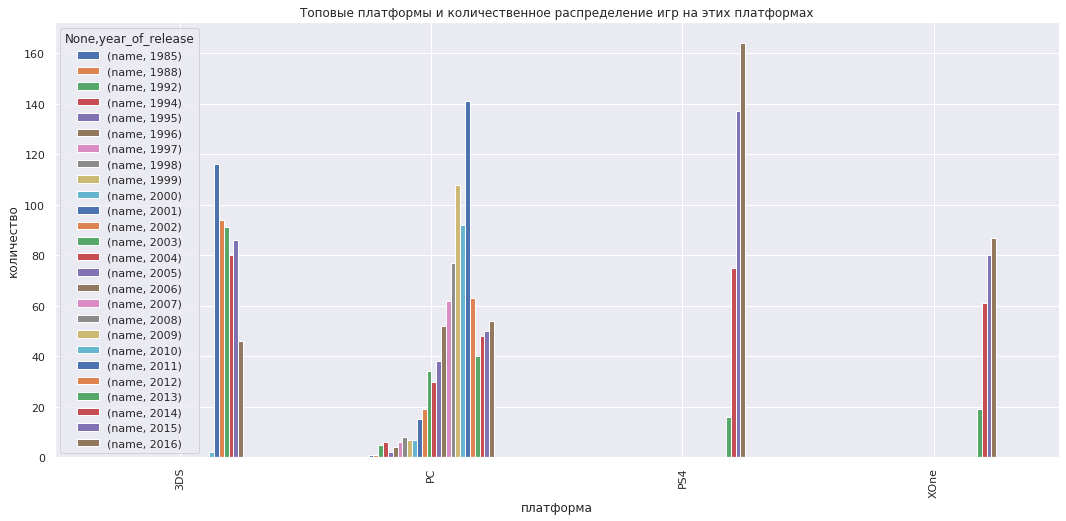

In [55]:
(games_table[(games_table['platform'].isin(['PS4', 'PC', 'XOne', '3DS']))]
 .pivot_table('name',['platform','year_of_release'], aggfunc='count')
 .unstack()
 .plot(kind='bar')
).set(title='Топовые платформы и количественное распределение игр на этих платформах');
plt.xlabel("платформа");
plt.ylabel("количество");
plt.show()

<strong>Вывод</strong>
    
    Количество игр растёт на платформах PS4, и XOne, в отличии от 3DS и PC (хотя и похоже на заход второй волны роста)

Рассмотрю разницу между годами и добавлю дельту

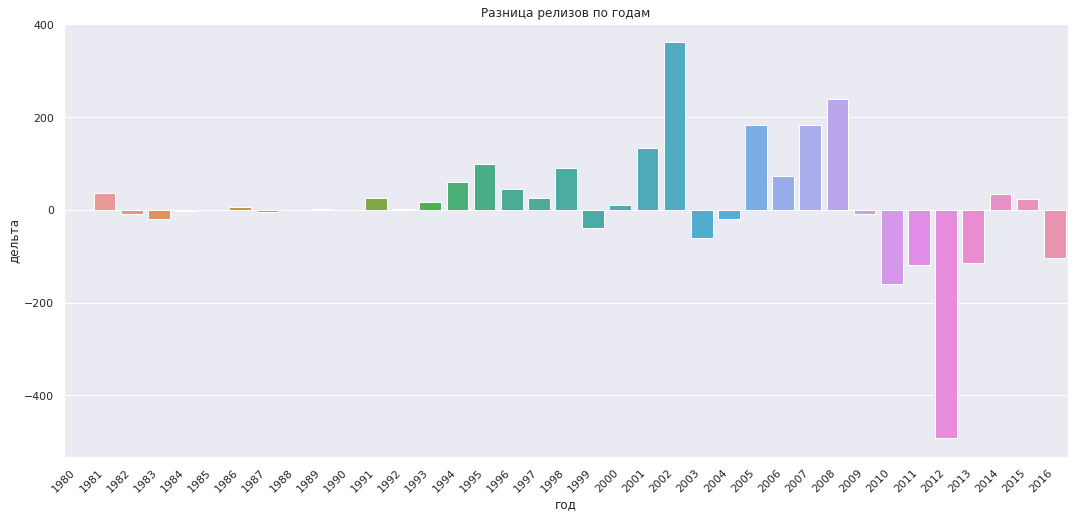

In [56]:
temp = (games_table.pivot_table('name',['year_of_release'], aggfunc='count'))
temp_delta = games_table.pivot_table('name',['year_of_release'], aggfunc = 'count')
b = temp_delta.T.to_dict()
temp_dict = {x: b[x]['name'] - b[x-1]['name'] for x in b if x > 1980}
temp_dict[1980] = 0
temp_delta['delta'] = temp_delta.apply(lambda x: x.index)
temp_delta['delta'] = temp_delta['delta'].apply(lambda x: temp_dict[x])
sns.barplot(x=temp_delta.index, y = 'delta', data = temp_delta)\
.set(title='Разница релизов по годам');
plt.xlabel("год");
plt.ylabel("дельта");
plt.xticks(rotation=45, horizontalalignment='right');

In [57]:
print('среднее - ',int(temp.loc[2012:2016].mean()))
print('стандарное отклонение - ',int(temp.loc[2012:2016].std()))

среднее -  579
стандарное отклонение -  60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text xticklabel objects>)

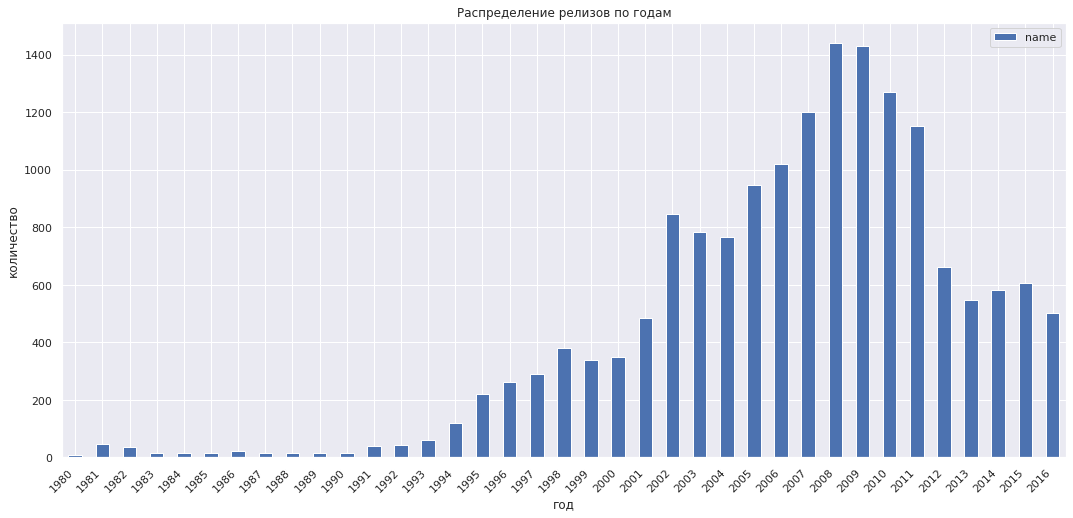

In [58]:
(games_table
 .pivot_table('name',['year_of_release'], aggfunc='count')
 .plot(kind='bar')
).set(title='Распределение релизов по годам');
plt.xlabel("год");
plt.ylabel("количество");
plt.xticks(rotation=45, horizontalalignment='right')


<strong>Вывод</strong>

   Динамика, которая началась в 1998 года обрушилась к 2012 году и суммарное количество игр уменьшилось резко в два раза. Новая тенденция началась устанавливаться в 2013 году. Как мне кажется, разработчикам игр пришлось выбрать новый путь, то есть от количественного показателя перешли к качественному игр. Осмелюсь предположить не обошлось без оглушительного успеха <a href="https://ru.wikipedia.org/wiki/Grand_Theft_Auto_V" target="_blank">GTA 5</a> .

Игровая индустрия усложняется, прогресс неумолимо двигается, технические характеристики растут игр растут, ресурсные потребности растут, цена игр растёт, количество платформ уменьшается.

Проверим какие игры были успешны, построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах:

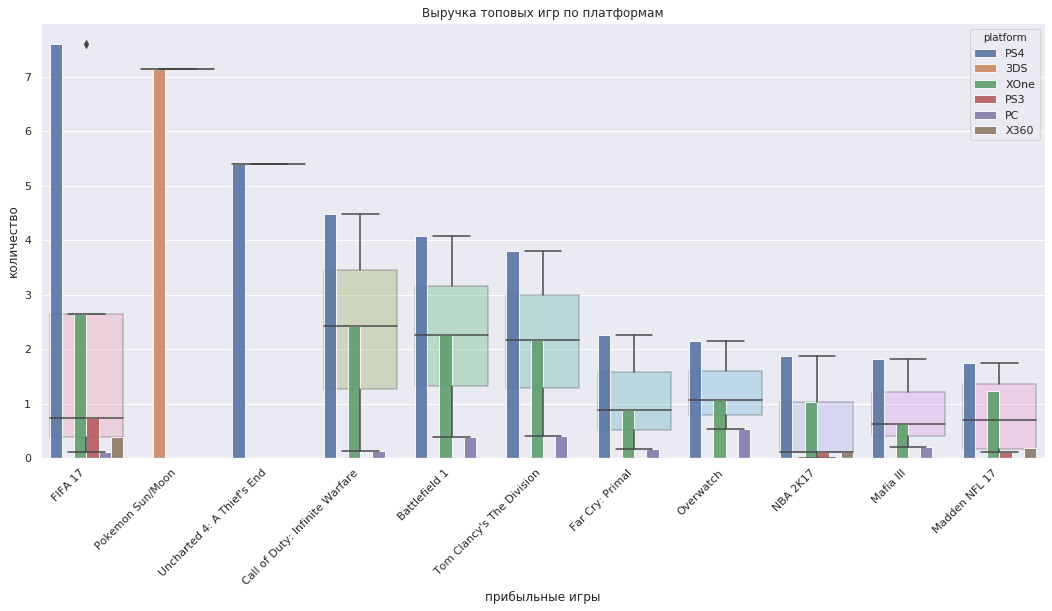

In [59]:
games_table_2016_topgame = (games_table
                    .query('year_of_release == 2016')
                    .sort_values(by='revenue', ascending=False)
                    .reset_index(drop=True)
                    .head(15)
                   )
name_game = set(games_table_2016_topgame['name'].values)


games_table_2016 = (games_table
                    .query('(year_of_release == 2016) and (name.isin(@name_game))')
                    .sort_values(by='revenue', ascending=False)
                    .reset_index(drop=True)
                   )
ax = sns.boxplot(x='name'\
                 ,y='revenue'\
                 #,hue = 'platform'\
                 ,data=games_table_2016\
                 ,boxprops=dict(alpha=.3)
                )
plt.xticks(rotation=45, horizontalalignment='right');
ax = sns.barplot(x='name',y='revenue', hue = 'platform', data=games_table_2016, alpha=.9)\
.set(title='Выручка топовых игр по платформам');
plt.xlabel("прибыльные игры");
plt.ylabel("количество");

<strong>Вывод</strong>

Топ игр: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика видно, что это топовые игры с самыми высокими показателями выручки, соответственно вывод о том, что топовыми платформами являются PS4, 3DS, XOne. PC - это платформа долгожитель, но это вполне логично, так как от ПК никто отказываться не планирует, ведь он связан со множеством других функций.

Изучу связи оценки критиков и пользовательские, есть сильная зависимость, поэтому сделаем общий столбец в котором отобразим усредненную оценку.

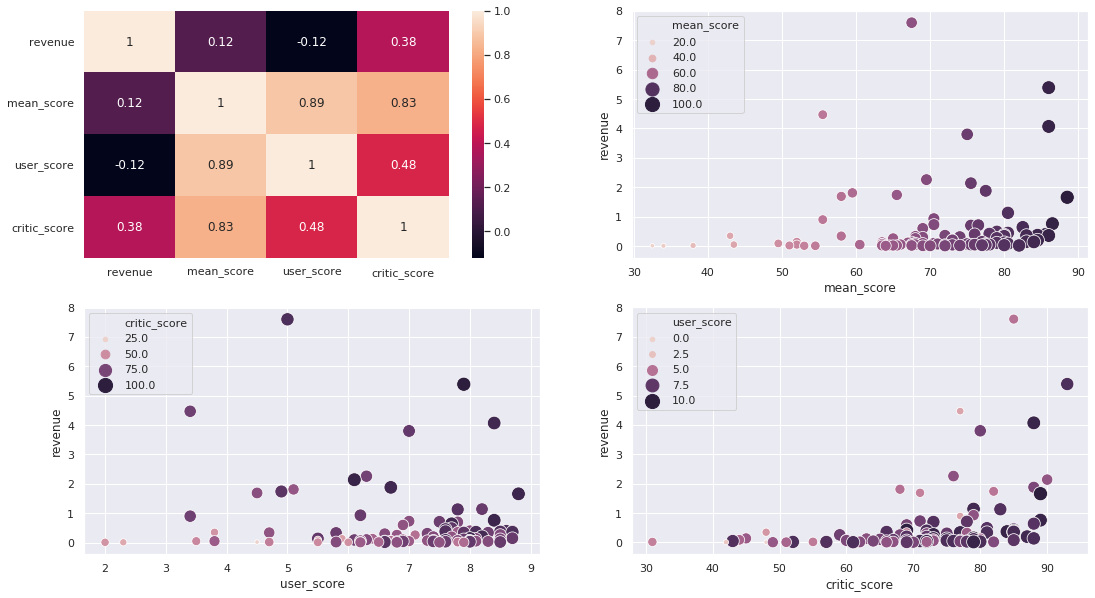

In [60]:
def func(row):
    user = row['user_score']*10
    critic = row['critic_score']
    if user==0:
        return critic
    elif critic==0:
        return user
    else:
        return (user+critic)/2
    
def temp_func(platformi):
    games_table['mean_score'] = games_table.apply(func,axis=1)

    temp = games_table.query('year_of_release == 2016\
                                and platform ==@platformi\
                                and user_score > 0\
                                and critic_score > 0').reset_index(drop=True)


    fig, axis = plt.subplots(2,2, figsize=(18,10))
    sns.heatmap(temp.loc[:,['revenue', 'mean_score', 'user_score', 'critic_score']].corr(),annot=True,ax=axis[0,0]);      
    sns.scatterplot(x='mean_score',y='revenue',hue = 'mean_score',size = 'mean_score',sizes = (20,200),data=temp,ax=axis[0,1]);
    sns.scatterplot(x='user_score',y='revenue',hue = 'critic_score',size = 'critic_score',sizes = (20,200), data=temp,ax=axis[1,0] );
    sns.scatterplot(x='critic_score',y='revenue',hue = 'user_score',size = 'user_score',sizes = (20,200), data=temp,ax=axis[1,1]);
temp_func('PS4')

Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.

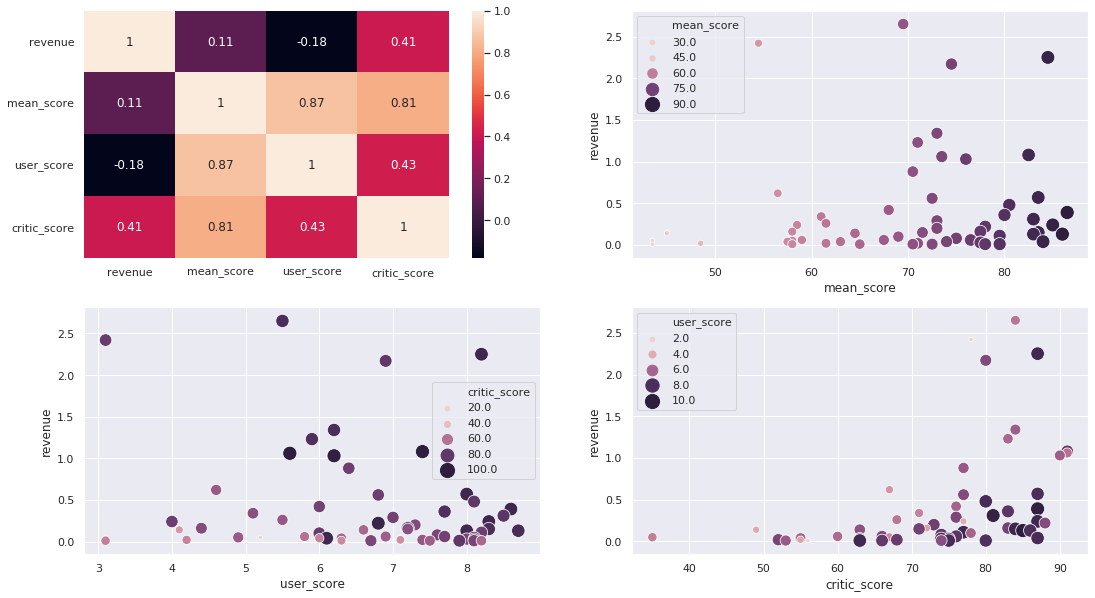

In [61]:
temp_func('XOne')

Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.

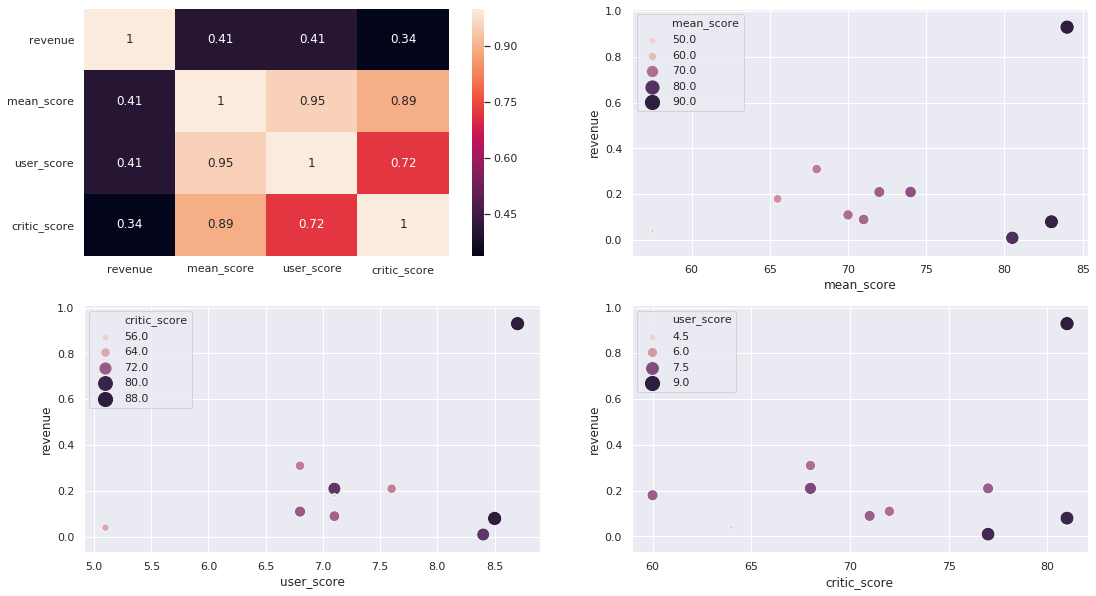

In [62]:
temp_func('3DS')

Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы.

<strong>Вывод</strong>

Корреляционная связь между отзывами пользователей, критиков и продажами есть, но слабо выраженая. Например у самой кассовой игры 2016 года - fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Стоит вспомнить распределение оценок на <a href="https://www.metacritic.com/" target="_blank">www.metacritic.com</a> .

<strong>Итог корреляционного анализа для топ - 3 платформ:</strong>

    Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
    Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
    Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы.
    
   Таким образом, пользовательские отзывы в большей части слабо коррелируют и в отрицателдьную сторону, что не совпадает с отзывами критиков, т.к. тут зависимость есть от 0.34-0.41 средневыраженая. Средний показатель отзывов не позволяет выявить корреляцию между отзывами и продажами, т.к. он постояно смещается. Соответственно, критики более точно прогнозируют успех игры, в отличии от пользователей. Конечно, вывод немного странный, но тут нужно с моей точки зрения проведение дополнительного анализа.

 <strong>Ключевые выводы:</strong>
   
   До 1994 года выпускалось не более 50 игр в год для разных платформ, а с 1994 года начался рост количества игр для платформ, где согласно тренду за пять лет происходит удвоение количества, но 2008 год стал экстемумом и было выпущено 1430 игр,а после 2009 года началось падение количественного показателя и в 2012 году - в 2 раза по сравнению с 2011, и зафиксировался снижающийся тренд и среднее количество игр выпускоемое в год - 579 +/-60
   
   Средний срок жизни платформы - 7 лет
   
   Количество игр растёт на платформах PS4 и XOne, в отличии от 3DS и PC.
   
   Топ-3 игр: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика видно, что это топовые игры с самыми высокими показателями выручки, соответственно вывод о том, что топовыми платформами являются PS4, 3DS, XOne. PC - это платформа долгожитель, но это вполне логично, т.к. от ПК никто отказываться не планирует, т.к. он связан со множеством других функций.
   
   Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например у самой кассовой игры 2016 года - fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества.
   
   Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
   
   Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
   
   Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы.
   
   Таким образом, пользовательские отзывы в большей части слабо коррелируют и в отрицателдьную сторону, что не совпадает с отзывами критиков, т.к. тут зависимость есть от 0.34-0.41 средневыраженая. Средний показатель отзывов не позволяет выявить корреляцию между отзывами и продажами, т.к. он постояно смещается. Соответственно, критики более точно прогнозируют успех игры, в отличии от пользователей. Конечно, вывод немного странный, но тут нужно с моей точки зрения проведение дополнительного анализа.
   
   Игровая индустрия очень быстро изменяется.
   
   Тренд выручки нисходящий.

   Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов.
   
   Топ-низ жанры: Adventure, Puzzle

### 4.2.  Портрет пользователя<a id='step4.2'></a>

<strong>Шаг 4. Портрет пользователя каждого региона</strong>

Определить для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [63]:
games_table.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue,mean_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,78.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,82.5
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38,0.0


Рассмотрю только 2016 год

In [64]:
games_table_2016 = games_table.query('year_of_release == 2016')

Посмотрю, что там по платформам

In [65]:
stat_games_table_2016 = games_table_2016\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','revenue'], ['platform'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)
def func(row):
     
    row.eu_sales = round(row.eu_sales/row.revenue,2)
    row.jp_sales = round(row.jp_sales/row.revenue,2)
    row.na_sales = round(row.na_sales/row.revenue,2)
    row.other_sales = round(row.other_sales/row.revenue,2)
    return row
stat_games_table_2016_delta = stat_games_table_2016.copy()
stat_games_table_2016_delta = stat_games_table_2016_delta.apply(func, axis=1)
stat_games_table_2016_delta

,eu_sales,jp_sales,na_sales,other_sales,revenue
platform,,,,,
PS4,0.46,0.08,0.31,0.15,69.25
XOne,0.37,0.00,0.55,0.09,26.15
3DS,0.15,0.53,0.27,0.04,15.14
WiiU,0.32,0.15,0.46,0.08,4.60
PC,0.67,0.00,0.26,0.07,5.25
X360,0.47,0.00,0.45,0.08,1.52
PS3,0.35,0.36,0.19,0.10,3.60
PSV,0.09,0.84,0.04,0.04,4.25
Wii,0.61,0.00,0.33,0.06,0.18


In [66]:
stat_games_table_2016

,eu_sales,jp_sales,na_sales,other_sales,revenue
platform,,,,,
PS4,31.78,5.74,21.49,10.24,69.25
XOne,9.63,0.01,14.27,2.24,26.15
3DS,2.33,8.03,4.14,0.64,15.14
WiiU,1.48,0.67,2.10,0.35,4.60
PC,3.53,0.00,1.36,0.36,5.25
X360,0.71,0.00,0.69,0.12,1.52
PS3,1.26,1.30,0.67,0.37,3.60
PSV,0.39,3.56,0.15,0.15,4.25
Wii,0.11,0.00,0.06,0.01,0.18


Построю график распределения

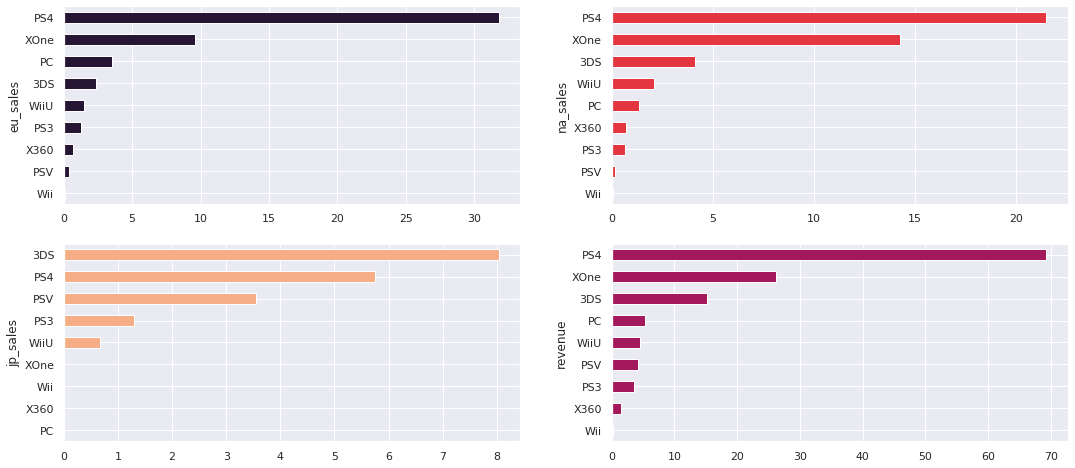

In [67]:
fig, axis = plt.subplots(2,2, figsize=(18,8))
stat_games_table_2016['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#271534').set(ylabel='eu_sales');
stat_games_table_2016['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#e33641').set(ylabel='na_sales');
stat_games_table_2016['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#f6ae87').set(ylabel='jp_sales');
stat_games_table_2016['revenue'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = '#a3195b').set(ylabel='revenue');

Добавлю долевое распределение

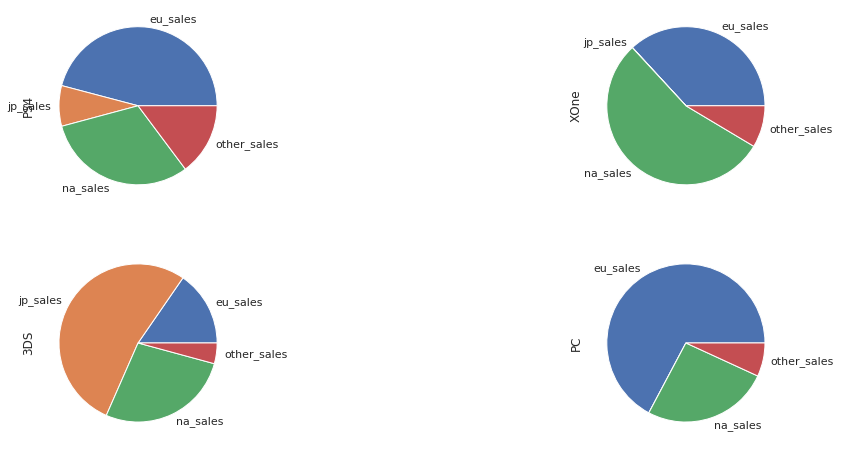

In [68]:
fig, axis = plt.subplots(2,2, figsize=(18,8))
stat_games_table_2016.loc['PS4',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,0]);
stat_games_table_2016.loc['XOne',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,1]);
stat_games_table_2016.loc['3DS',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,0]);
stat_games_table_2016.loc['PC',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,1]);

<strong>Вывод</strong>

Самые популярные платформы (топ-5)
1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
3. NA: PS4, XOne, 3DS, WiiU, PC - CША

Посмотрю, что там по жанрам

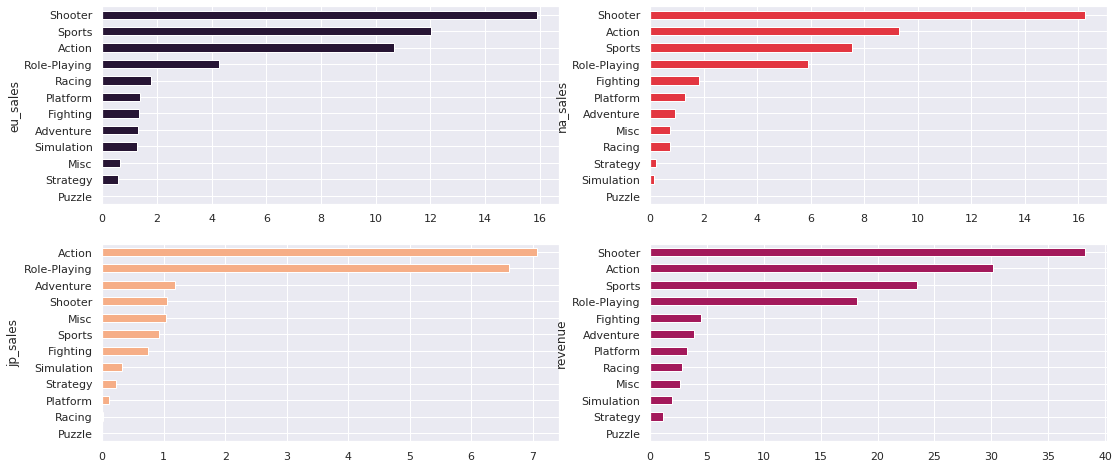

In [69]:
stat_games_table_2016_g = games_table_2016\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','revenue'], ['genre'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)

fig, axis = plt.subplots(2,2, figsize=(18,8))

stat_games_table_2016_g['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#271534').set(ylabel='eu_sales');
stat_games_table_2016_g['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#e33641').set(ylabel='na_sales');
stat_games_table_2016_g['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#f6ae87').set(ylabel='jp_sales');
stat_games_table_2016_g['revenue'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = '#a3195b').set(ylabel='revenue');

Добавлю долевое распределение

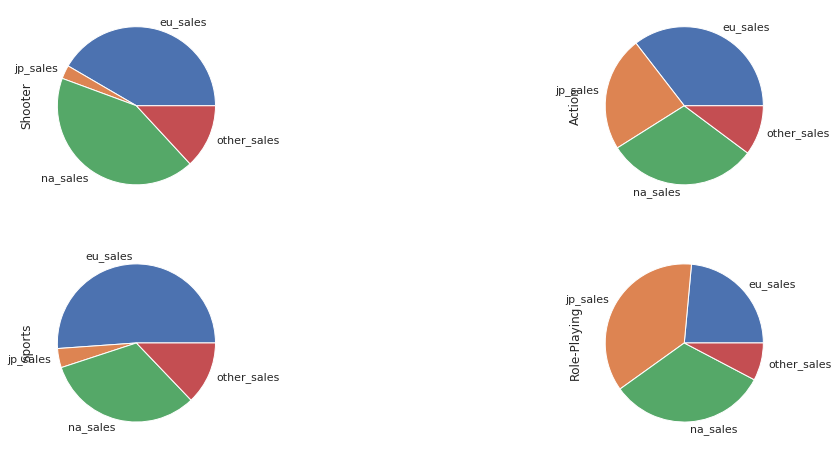

In [70]:
fig, axis = plt.subplots(2,2, figsize=(18,8))
stat_games_table_2016_g.loc['Shooter',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,0]);
stat_games_table_2016_g.loc['Action',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,1]);
stat_games_table_2016_g.loc['Sports',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,0]);
stat_games_table_2016_g.loc['Role-Playing',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,1]);

<strong>Вывод</strong>

Самые популярные жанры (топ-5)

1. EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
2. JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
3. NA: Shooter, Action, Sports, Role-Playing, Fighting - CША

Выясню влияние рейтинга ESRB на продажи в отдельном регионе

In [71]:
games_table_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue,mean_score
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,67.5
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,0.0,tbd,7.14,0.0
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,86.0
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47,55.5
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07,86.0


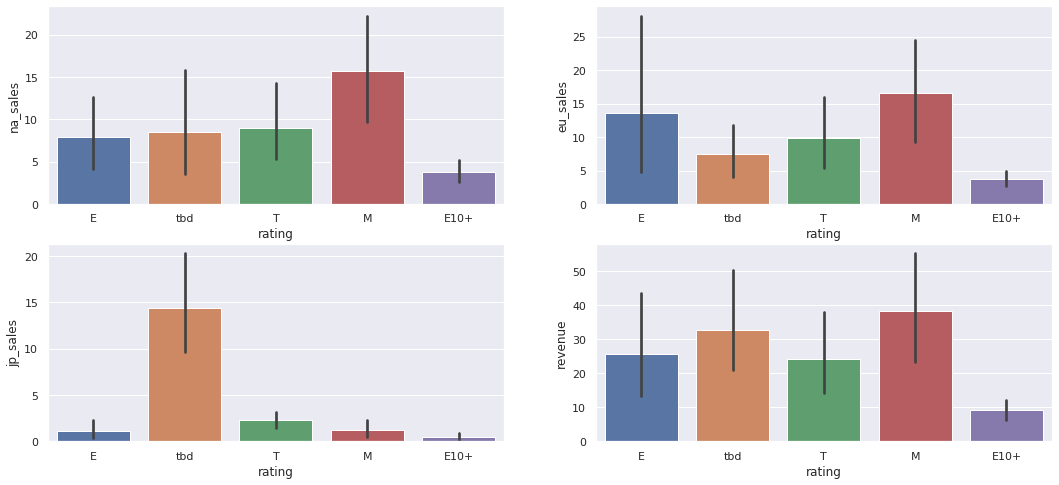

In [72]:
fig, axis = plt.subplots(2,2, figsize=(18,8))
sns.barplot(y='na_sales', x='rating', data = games_table_2016,estimator=sum, ax=axis[0,0]);
sns.barplot(y='eu_sales', x='rating', data = games_table_2016,estimator=sum, ax=axis[0,1]);
sns.barplot(y='jp_sales', x='rating', data = games_table_2016,estimator=sum, ax=axis[1,0]);
sns.barplot(y='revenue', x='rating', data = games_table_2016,estimator=sum, ax=axis[1,1]);

Вижу влияние рейтинга и это проявляется на графике, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

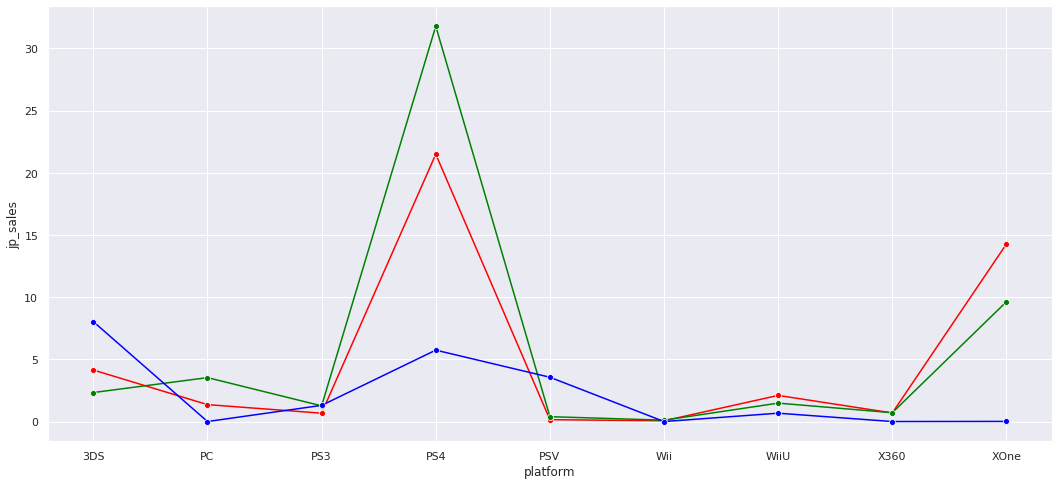

In [73]:
sns.lineplot(x=stat_games_table_2016.index, y='na_sales', data=stat_games_table_2016, color = 'red', marker='o');
sns.lineplot(x=stat_games_table_2016.index, y='eu_sales', data=stat_games_table_2016, color = 'green', marker='o');
sns.lineplot(x=stat_games_table_2016.index, y='jp_sales', data=stat_games_table_2016, color = 'blue', marker='o');

 <strong>Ключевые выводы:</strong>

       Пользователи Европы и Штатов любят "шутеры", что соответствует платформе PS4 и XOne, но американские пользователи предпочитают "экшен" жанр - спортивному, в топе у европейцев входят "гонки", а у представителей штатов "файтинги". 
       Портрет японского игрока полностью отличается, так как главный игровой жанр - "экшен", а основная консоль - 3DS. По большей части игровые жанры для определённого региона соответствуют менталитету и культуре стран, консоли же подбираются исходя из основных жанров. Правда некоторые платформы имеют множество жанров, что позволяет покрыть потребности разных регионов. 
       Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

### 4.3.  Проверка гипотез<a id='step4.3'></a>

<strong>Шаг 5. Проверить статистические гипотезы</strong> 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [74]:
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка
1,v1,смена типа(int32) и заполнение(nan на 0),games_table_v1,модификация - year_of_release
2,v2,"удалены пропуски, дубли",games_table_v2,"0 в рейтинге - не оценен, дабавлен revenue"
3,v3,восстановлены года,games_table_v3,файл готов к анализу


In [75]:
games_table_v3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


<strong>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</strong> 

Выдвинем гипотезы:

H₀ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 - средние пользовательские рейтинги платформ Xbox One и PC не одинакове, отличаются между собой

alpha = .05 - критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу.

In [76]:
xone = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&\
                           (games_table_v3['platform'] == 'XOne')&(games_table_v3['user_score'] != 0)]['user_score'])
pc = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&\
                         (games_table_v3['platform'] == 'PC')&(games_table_v3['user_score'] != 0)]['user_score'])

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone, 
    pc,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые")

p-значение: 0.33982
Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые


Оставил актуальный год, так как при проведении статистического теста по всему периоду, получилось, что рейтинги платформ разные и нулевая гипотеза отвергалась, но когда был выбран актуальный период - 2016 год, то ситуация изменилась и нулевая гипотеза была принята. 

<strong>Средние пользовательские рейтинги жанров Action и Sports разные</strong> 

Выдвинем гипотезы:

H₀ - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различаются между собой

alpha = .05 - критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу.

In [77]:
action = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&(games_table_v3['genre'] == 'Action')]['user_score'])
sports = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&(games_table_v3['genre'] == 'Sports')]['user_score'])

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action, 
    sports,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равные")

p-значение: 0.06453
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равные


Снова оставил актуальный год, так как при проведении статистического теста по всему периоду, получилось, что рейтинги жанров action и sports разные и нулевая гипотеза отвергалась, но когда был выбран актуальный период, то ситуация изменилась и нулевая гипотеза не отвергнута, что означет, что альтернативная гипотеза отвергнута и средние рейтинги равны со статистической значимостью 0.05.

## 5.  Заключение<a id='step5'></a>

       Первичный анализ произведен, обнаружены проблемы с типами данных в столбцах: year_of_release, users_scores и разнорегистрововые наименования, для корректной работы потребовалось привести столбцы к int32, float32 - типам, а наименования трансформировать в нижний регистр. В data sets имеются пропуски, как данные собирались из открытых источников. Пропуск в наименовании игры может означать невозвожность кодирования на латиницу исходного наименования, либо некоректная отработка сборщика. Отсутствие пользовательских отзывов и критиков. Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA.
        
       Подготовка данных к анализу произведена:
    Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра.
    Пропуски в столбце rating были замененны на tbd, что означает что рейтинга нет или он ожидается
    Пропуски в столбцах critic_score и user_score были заменены на нулевые, что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. будет смещение в данных.
    Суммарные продажи посчитаны.
    
       Исследовательский анализ выполнен:
       До 1994 года выпускалось примерно 50 игр в год для разных платформ, а с 1994 года начался рост количества игр для платформ, где согласно тренду за пять лет происходит удвоение количества, но 2008 год стал экстемумом и было выпущено 1430 игр,а после 2009 года началось падение количественного показателя и в 2012 году - в 2 раза по сравнению с 2011, и зафиксировался снижающийся тренд и среднее количество игр выпускоемое в год - 579 +/-60;
       Средний срок жизни платформы равен 7 годам;
       Предварительный - да, но не зватает дополнительных данных активность игроков на платформе;
       Количество игр растёт на платформах PS4 и XOne, в отличии от 3DS и WiiU;
       Топ3 игр: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика видно, что это топовые игры с самыми высокими показателями выручки, соответственно вывод о том, что топовыми платформами являются PS4, 3DS, XOne. PC - это платформа долгожитель, но это вполне логично, т.к. от ПК никто отказываться не планирует, т.к. он связан со множеством других функций;
       Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например, у самой кассовой игры 2016 года - fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества;
       Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы;
       Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы;
       Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы;
       Таким образом, пользовательские отзывы в большей части слабо коррелируют и в отрицателдьную сторону, что не совпадает с отзывами критиков, т.к. тут зависимость есть от 0.34-0.41 средневыраженая. Средний показатель отзывов не позволяет выявить корреляцию между отзывами и продажами, т.к. он постояно смещается. Соответственно, критики более точно прогнозируют успех игры, в отличии от пользователей. Конечно, вывод немного странный, но тут нужно с моей точки зрения проведение дополнительного анализа. Правда, отличается сильно по всем коэффициентам корреляции платформа 3DS, где отзывов критиков меньше, а пользователи оцинивают на порядок лучше, чем пользователи платформ PS4 и XOne;
       Игровая индустрия очень быстро изменяется:тренд выручки нисходящий; топ платформы: PS4, WiiU, XOne, 3DS. (по усреднённой сумарной выручке);
       Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов; Топ-низ жанры: Adventure, Puzzle. (по усреднённой сумарной выручке);
       
       Портреты пользователей составлены (по суммарным показателям выручки):

       Самые популярные платформы (топ-5).
    EU: PS4, XOne, PC, 3DS, WiiU - Европа
    JP: 3DS, PS4, PSV, PS3, WiiU - Япония
    NA: PS4, XOne, 3DS, WiiU, PC - CША

       Самые популярные жанры (топ-5)
    EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
    JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
    NA: Shooter, Action, Sports, Role-Playing, Fighting - CША

       Влияет ли рейтинг ESRB на продажи в отдельном регионе?

       Да, влияние есть, и это проявляется на графике, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.
       Пользователи Европы и Штатов любят "шутеры", что соответствует платформе PS4 и XOne, но американские пользователи предпочитают "экшен" жанр - спортивномe, в топе у европейцев входят "гонки", а у представителей штатов "файтинги". Портрет японского игрока полностью отличается, т.к. главный игровой жанр - "экшен", а основная консоль - 3DS. По большей части игровые жанры для определённого региона соответствуют менталитету и культуре стран, консоли же подбираются исходя из основных жанров. Правда некоторые платформы имеют множество жанров, что позволяет покрыть потребности разных регионов. Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

       Проверка гипотез
       Первая гипотеза: HO - подтвердилась, H1 - отвергнута. Что подтвердило статистическую гипотезу о равенстве пользовательских рейтингов, т.к. базировалась она на нулевой. При проведении статистического теста по всему периоду, получилось, что рейтинги платформ разные и нулевая гипотеза отвергалась, но когда был выбран актуальный период - 2016 год, то ситуация изменилась и нулевая гипотеза не отвергнута.
       Вторая гипотеза: HO - принята, H1 - отвергнута. При проведении статистического теста по всему периоду, получилось, что рейтинги жанров action и sports разные и нулевая гипотеза отвергалась, НО когда был выбран актуальный период, то ситуация изменилась и нулевая гипотеза не отвергнута, что означет, что альтернативная гипотеза отвергнута и средние рейтинги равны со статистической значимостью 0.05.